In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import xgboost as xgb

Read data from csv

In [417]:
df_train = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df_train.head()

/tmp/ipykernel_3370/702890262.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,Number,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,Loan_Type,Delay_from_due_date,Total_Delayed_Payments,Credit_Limit,Total_Credit_Enquiries,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x522a,CUS_0x2dbf,May,Abhishek Vishnoiw,51,370-51-2390,Musician,101583.48,NaN,5,7,10,4_,"Payday Loan, Student Loan, Payday Loan, and De...",8,8,2.89,5.0,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.0157894388726,Low_spent_Large_value_payments,314.0021934422197,Standard
1,0x6091,CUS_0x8167,August,Freifeldu,23,721-85-0529,Writer,101926.95,8635.9125,4,4,9,1,Mortgage Loan,13,9,10.26,6.0,_,1058,39.693812,20 Years and 5 Months,No,70.587681,662.8039273360225,Low_spent_Medium_value_payments,410.1996419555151,Standard
2,0xcb5f,CUS_0x3a0b,February,NaN,49,618-96-2558,Writer,158871.12,NaN,0,4,8,1,Home Equity Loan,8,2,1.17,4.0,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.8059854204569,Low_spent_Medium_value_payments,742.5141542054829,Standard
3,0x17dbc,CUS_0x9a4b,March,Alex Dobuzinskiso,40,817-31-4270,Doctor,60379.28,NaN,5,6,18,3,"Personal Loan, Mortgage Loan, and Credit-Build...",15,12,6.83,1.0,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.41865803064803,High_spent_Medium_value_payments,473.13562343490486,Standard
4,0x225b3,CUS_0x253a,June,NaN,17,580-53-4920,Accountant,50050.83,4085.9025,9,10,20,5,"Student Loan, Credit-Builder Loan, Debt Consol...",28,NaN,15.45,8.0,Bad,3419.1,30.386321,4 Years and 6 Months,Yes,190.445060,56.789441169542684,High_spent_Large_value_payments,401.3557486786916,Poor


In [418]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71971 non-null  object 
 4   Age                       80000 non-null  object 
 5   Number                    80000 non-null  object 
 6   Profession                80000 non-null  object 
 7   Income_Annual             80000 non-null  object 
 8   Base_Salary_PerMonth      67968 non-null  float64
 9   Total_Bank_Accounts       80000 non-null  int64  
 10  Total_Credit_Cards        80000 non-null  int64  
 11  Rate_Of_Interest          80000 non-null  int64  
 12  Total_Current_Loans       80000 non-null  object 
 13  Loan_Type                 70843 non-null  object 
 14  Delay_

# EDA on Categorical Values
1. Check unique values using `unique()`.
2. Get value counts using `value_counts()`.
3. Get basic statistics using `describe()`.
4. Replace missing values with mode.
5. Visualize distribution using `seaborn` or `matplotlib`.
6. Replace garbage values with `NaN`.
7. Replace specific values with mode.


In [419]:
# Fill missing data with mode using groupby
df_train['Name'] = df_train.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df_train['Base_Salary_PerMonth'] = df_train.groupby('Customer_ID')['Base_Salary_PerMonth'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df_train["Loan_Type"] = df_train.groupby('Customer_ID')["Loan_Type"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df_train["Total_Delayed_Payments"] = df_train.groupby('Customer_ID')["Total_Delayed_Payments"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df_train["Total_Credit_Enquiries"] = df_train.groupby('Customer_ID')["Total_Credit_Enquiries"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df_train["Credit_History_Age"] = df_train.groupby('Customer_ID')["Credit_History_Age"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df_train["Monthly_Investment"] = df_train.groupby('Customer_ID')["Monthly_Investment"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df_train["Monthly_Balance"] = df_train.groupby('Customer_ID')["Monthly_Balance"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

/tmp/ipykernel_3370/1092171885.py:9: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  df_train["Monthly_Balance"] = df_train.groupby('Customer_ID')["Monthly_Balance"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
/tmp/ipykernel_3370/1092171885.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Monthly_Balance"] = df_train.groupby('Customer_ID')["Monthly_Balance"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))


In [420]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      80000 non-null  object 
 4   Age                       80000 non-null  object 
 5   Number                    80000 non-null  object 
 6   Profession                80000 non-null  object 
 7   Income_Annual             80000 non-null  object 
 8   Base_Salary_PerMonth      80000 non-null  float64
 9   Total_Bank_Accounts       80000 non-null  int64  
 10  Total_Credit_Cards        80000 non-null  int64  
 11  Rate_Of_Interest          80000 non-null  int64  
 12  Total_Current_Loans       80000 non-null  object 
 13  Loan_Type                 80000 non-null  object 
 14  Delay_

In [421]:
# Remove 'Unknown' values
removeUnknownCols = ['Name', "Loan_Type", "Credit_History_Age"]

for col in removeUnknownCols:
    df_train = df_train[df_train[col] != 'Unknown']

In [422]:
# # Fill missing data with mode
# df_train['Name'] = df_train['Name'].fillna(df_train['Name'].mode()[0])
# df_train['Base_Salary_PerMonth'] = df_train['Base_Salary_PerMonth'].fillna(df_train['Base_Salary_PerMonth'].mode()[0])
# df_train["Loan_Type"] = df_train["Loan_Type"].fillna(df_train["Loan_Type"].mode()[0])
# df_train["Total_Delayed_Payments"] = df_train["Total_Delayed_Payments"].fillna(df_train["Total_Delayed_Payments"].mode()[0])
# df_train["Total_Credit_Enquiries"] = df_train["Total_Credit_Enquiries"].fillna(df_train["Total_Credit_Enquiries"].mode()[0])
# df_train["Credit_History_Age"] = df_train["Credit_History_Age"].fillna(df_train["Credit_History_Age"].mode()[0])
# df_train["Monthly_Investment"] = df_train["Monthly_Investment"].fillna(df_train["Monthly_Investment"].mode()[0])
# df_train["Monthly_Balance"] = df_train["Monthly_Balance"].fillna(df_train["Monthly_Balance"].mode()[0])

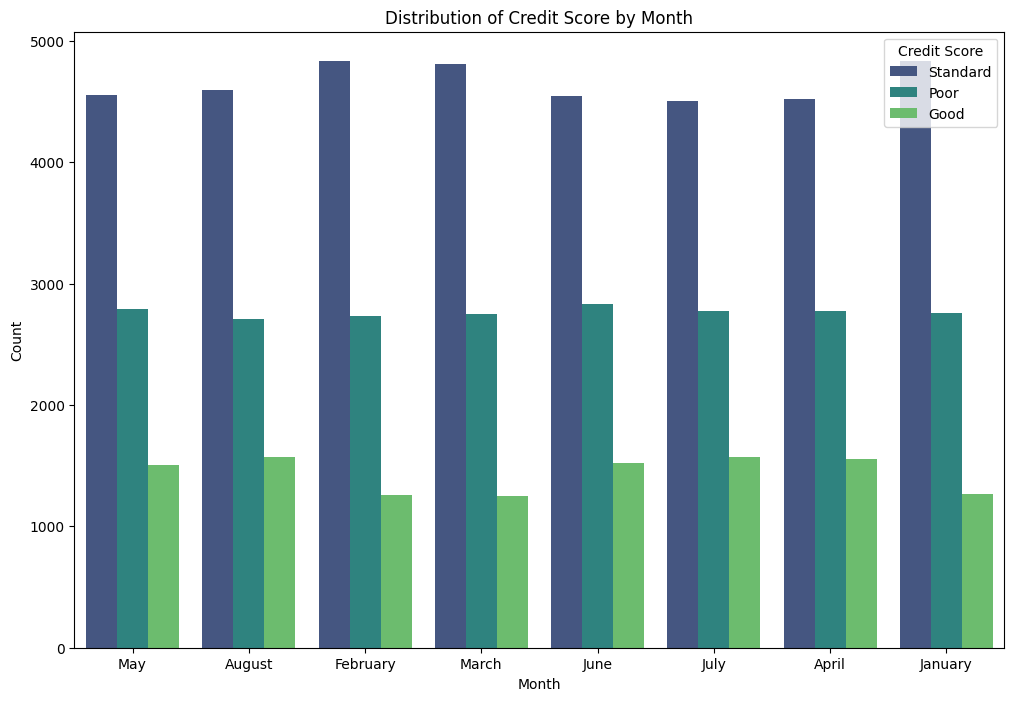

In [423]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_train, x='Month', hue='Credit_Score', palette='viridis')
plt.title('Distribution of Credit Score by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

In [424]:
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

In [425]:
# Create describe function for categorical values to get basic statistics
def describe_categorical(df):
    unique = df.unique()
    print(f'Unique values: {unique}')
    value_counts = df.value_counts()
    print(f'Value counts: {value_counts}')
    print("\nStatistics:")
    print(df.describe())

In [426]:
describe_categorical(df_train['Number'])

Unique values: ['370-51-2390' '721-85-0529' '618-96-2558' ... '777-30-0937' '789-15-7049'
 '836-74-3048']
Value counts: Number
#F%$D@*&8      3929
596-84-2916       8
535-97-5026       8
835-67-2782       8
245-14-1659       8
               ... 
925-05-6508       2
789-15-7049       2
780-95-9814       2
698-31-2770       2
391-36-7954       1
Name: count, Length: 11074, dtype: int64

Statistics:
count         70839
unique        11074
top       #F%$D@*&8
freq           3929
Name: Number, dtype: object


Remove garbage value (#F%$D@*&8) from Number column



In [427]:
# Replace the garbage value with NaN
df_train['Number'] = df_train['Number'].replace('#F%$D@*&8', np.nan)

Plot a graph of credit_score and occupation

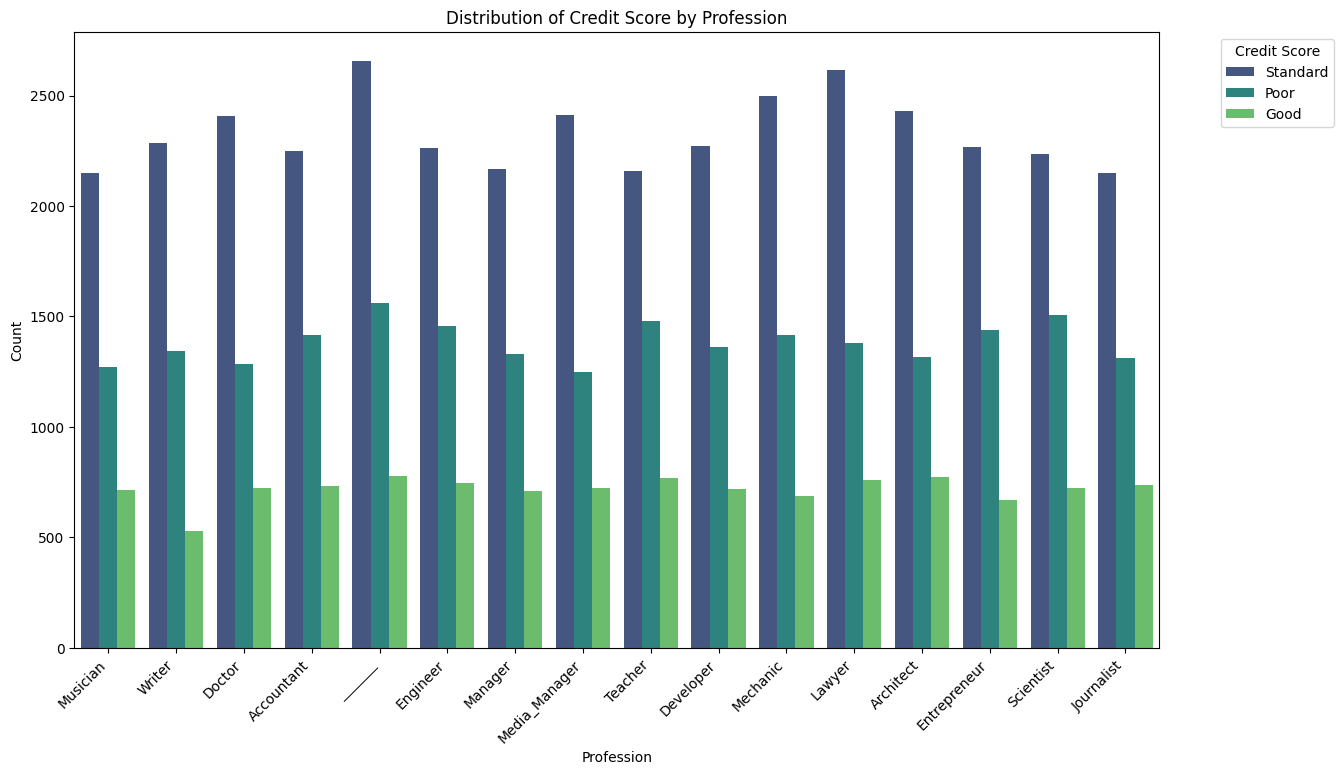

In [428]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_train, x='Profession', hue='Credit_Score', palette='viridis')
plt.title('Distribution of Credit Score by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [429]:
describe_categorical(df_train['Loan_Type'])

Unique values: ['Payday Loan, Student Loan, Payday Loan, and Debt Consolidation Loan'
 'Mortgage Loan' 'Home Equity Loan' ...
 'Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan'
 'Credit-Builder Loan, Auto Loan, Debt Consolidation Loan, and Personal Loan'
 'Debt Consolidation Loan, Auto Loan, Debt Consolidation Loan, and Auto Loan']
Value counts: Loan_Type
Not Specified                                                                                                                         1105
Credit-Builder Loan                                                                                                                   1024
Student Loan                                                                                                                          1021
Personal Loan                                                                                                                         1014
Debt Consolidation

Replace not specified with mode

In [430]:
df_train['Loan_Type'] = df_train['Loan_Type'].replace('Not specified', df_train['Loan_Type'].mode()[0])

In [431]:
# Drop loan_type
df_train = df_train.drop('Loan_Type', axis=1)

EDA on credit mix

In [432]:
describe_categorical(df_train['Credit_Mix'])

Unique values: ['Standard' '_' 'Good' 'Bad']
Value counts: Credit_Mix
Standard    25963
Good        15444
Bad         15223
_           14209
Name: count, dtype: int64

Statistics:
count        70839
unique           4
top       Standard
freq         25963
Name: Credit_Mix, dtype: object


Replace missing values with mode

In [433]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace('_', df_train['Credit_Mix'].mode()[0])

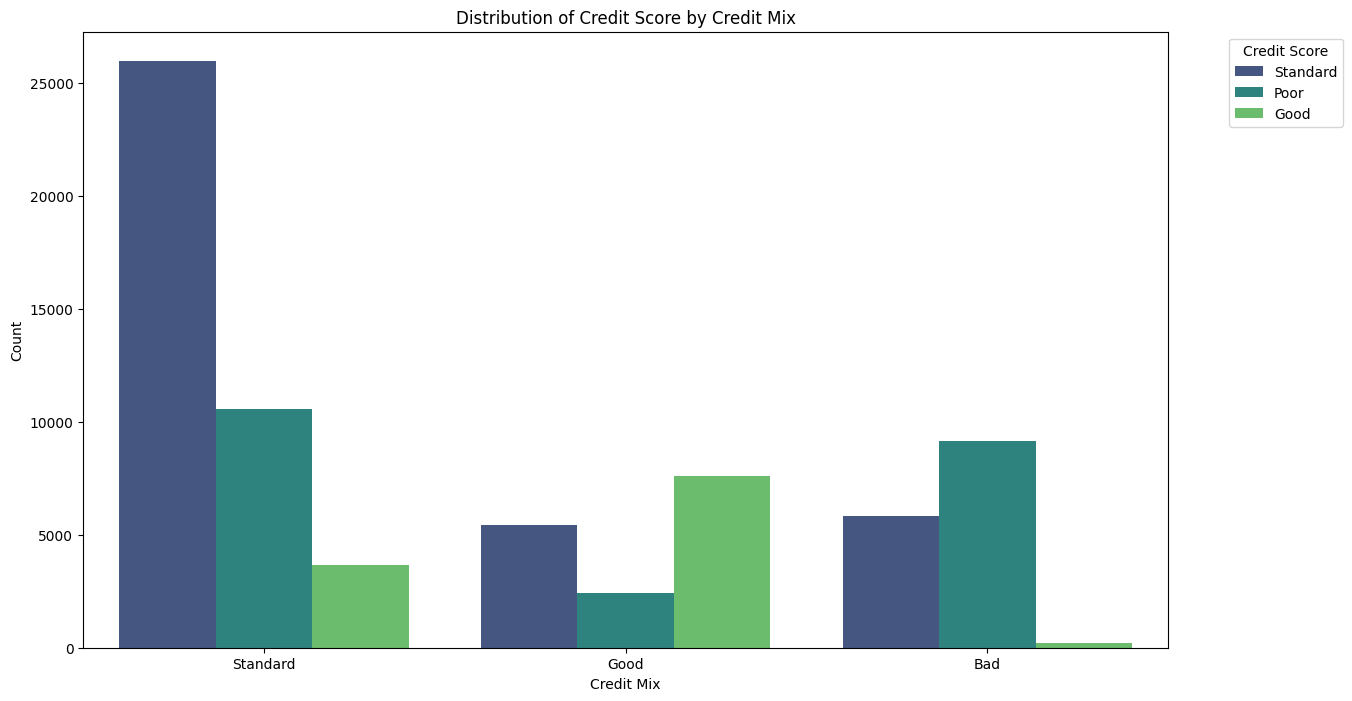

In [434]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_train, x='Credit_Mix', hue='Credit_Score', palette='viridis')
plt.title('Distribution of Credit Score by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

EDA on payment behavior

In [435]:
describe_categorical(df_train['Payment_Behaviour'])

Unique values: ['Low_spent_Large_value_payments' 'Low_spent_Medium_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Small_value_payments' 'High_spent_Small_value_payments'
 '!@9#%8']
Value counts: Payment_Behaviour
Low_spent_Small_value_payments      18558
High_spent_Medium_value_payments    12346
Low_spent_Medium_value_payments      9761
High_spent_Large_value_payments      9426
High_spent_Small_value_payments      8006
Low_spent_Large_value_payments       7354
!@9#%8                               5388
Name: count, dtype: int64

Statistics:
count                              70839
unique                                 7
top       Low_spent_Small_value_payments
freq                               18558
Name: Payment_Behaviour, dtype: object


In [436]:
# Replace the garbage values with mode
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].replace('!@9#%8', df_train['Payment_Behaviour'].mode()[0])

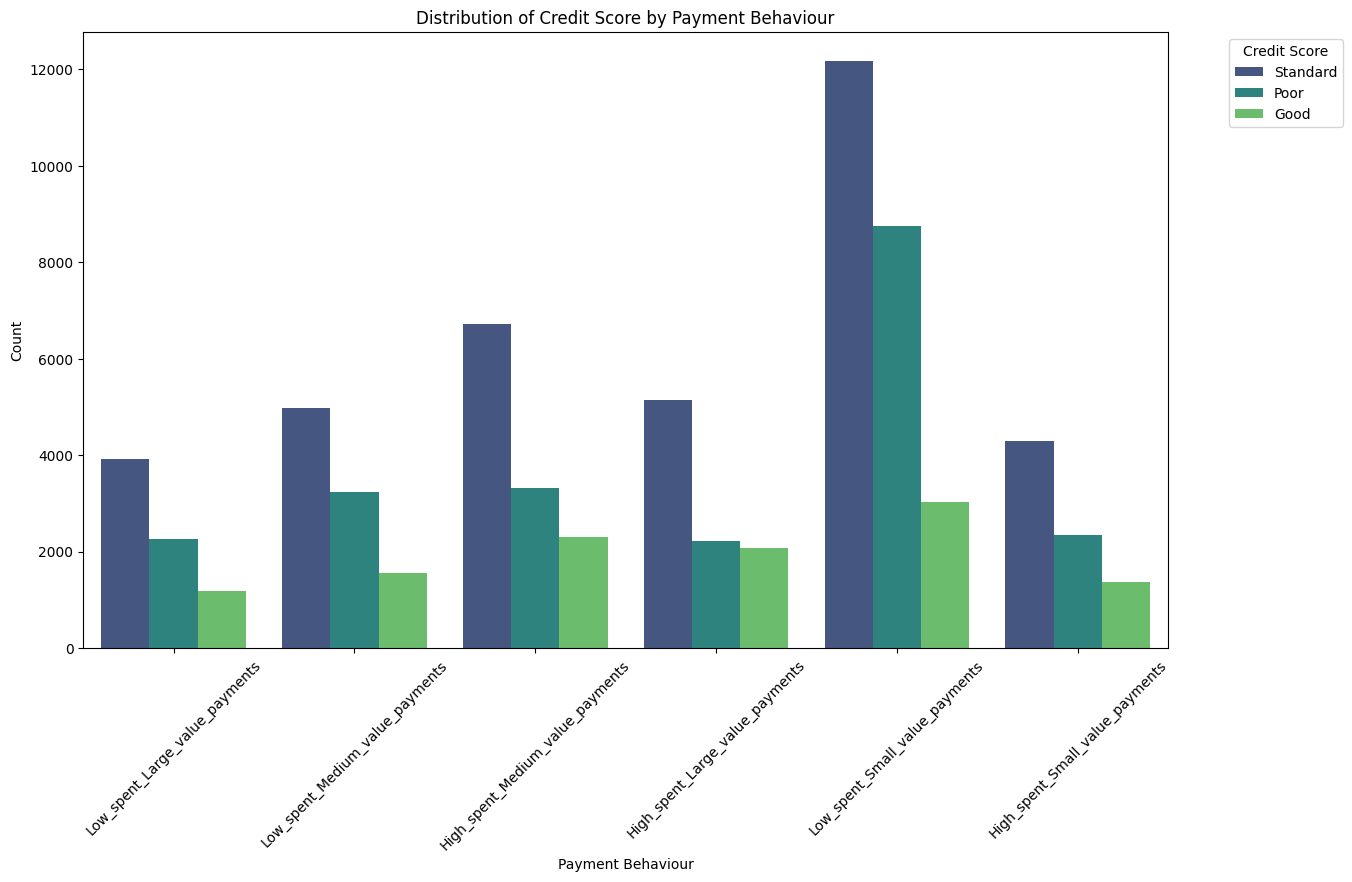

In [437]:
# Plot the distribution of Payment Behaviour vs Credit Score
plt.figure(figsize=(14, 8))
sns.countplot(data=df_train, x='Payment_Behaviour', hue='Credit_Score', palette='viridis')
plt.title('Distribution of Credit Score by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# EDA on Numerical Values

1. Remove special characters.
2. Convert datatype from object to int/float if required.
3. Replace outliers and null values with mode.

EDA on Age

In [438]:
# Function to analyze numerical data
def describe_numerical(df):
    print("\nStatistics:")
    print(df.describe())
    print(f"\nMode: {df.mode()[0]}")
    print(f"\nUnique values: {df.unique()}")

def plot_numerical(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, kde=True, color='blue')
    plt.title('Distribution of ' + df.name)
    plt.xlabel(df.name)
    plt.ylabel('Count')
    plt.show()

def removeOutliers(df, lower_quantile=0.2, upper_quantile=0.8):
    Q1 = df.quantile(lower_quantile)
    Q3 = df.quantile(upper_quantile)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # df = df[(df > lower_bound) & (df < upper_bound)]

    # Replace outliers with mode
    df = df.mask(df < lower_bound, df.mode()[0])
    df = df.mask(df > upper_bound, df.mode()[0])
    
    return df

EDA on Age

In [439]:
describe_numerical(df_train['Age'])


Statistics:
count     70839
unique     1314
top          38
freq       2049
Name: Age, dtype: object

Mode: 38

Unique values: ['51' '23' '49' ... '5429' '1609' '2895']


In [440]:
# Replace '_' with blank in Age
df_train['Age'] = df_train['Age'].str.replace('_', '', regex=True)

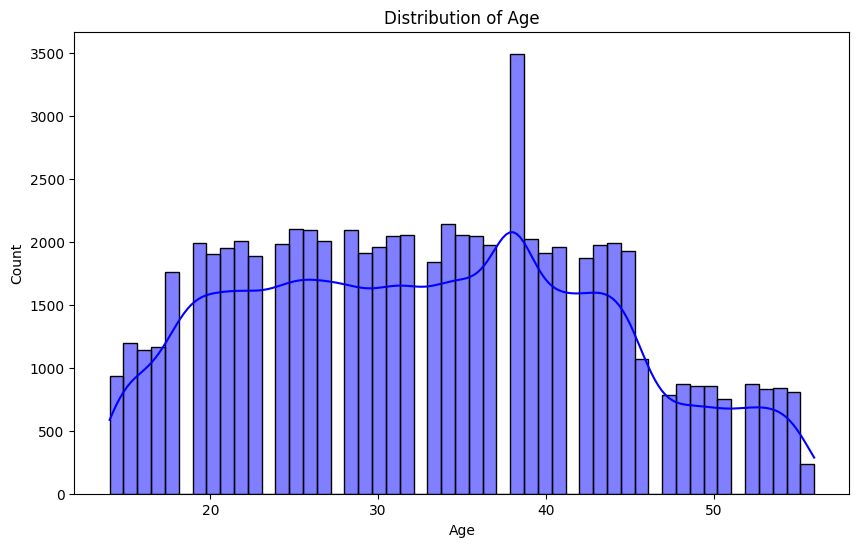

In [441]:
# Convert Age to numeric
df_train['Age'] = pd.to_numeric(df_train['Age'])
df_train = df_train[df_train['Age'] >= 0]

# Remove outliers using IQR
df_train['Age'] = removeOutliers(df_train['Age'])

# Replace missing values with mode
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])

plot_numerical(df_train['Age'])

EDA on annual income

In [442]:
describe_numerical(df_train['Income_Annual'])


Statistics:
count        70220
unique       15750
top       20867.67
freq            13
Name: Income_Annual, dtype: object

Mode: 20867.67

Unique values: ['101583.48' '101926.95' '158871.12' ... '31276.27_' '30000.82_'
 '8227.855_']


In [443]:
# Replace _ with blank in Income_Annual
df_train['Income_Annual'] = df_train['Income_Annual'].str.replace('_', '', regex=True)


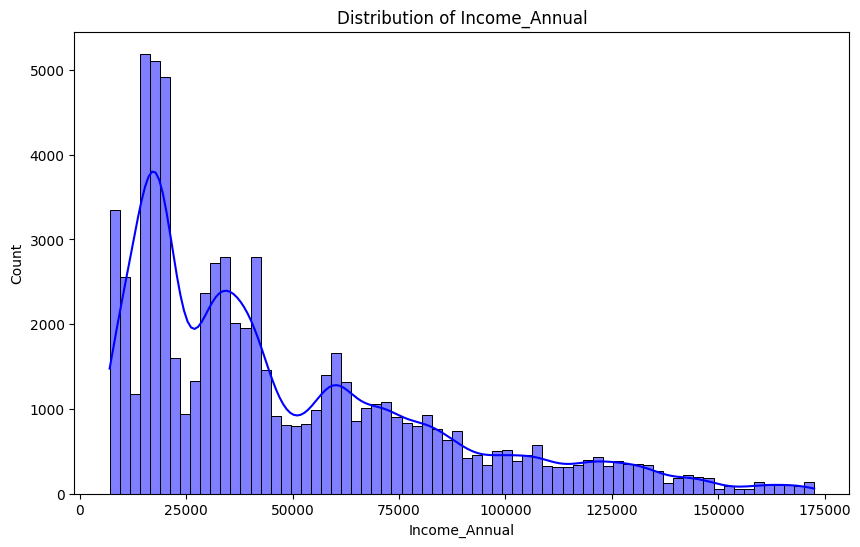

In [444]:
# Convert Income_Annual to numeric
df_train['Income_Annual'] = pd.to_numeric(df_train['Income_Annual'])

# Replace missing values with mode
df_train['Income_Annual'] = df_train['Income_Annual'].fillna(df_train['Income_Annual'].mode()[0])

# Remove outliers using IQR
df_train['Income_Annual'] = removeOutliers(df_train['Income_Annual'])                    
plot_numerical(df_train['Income_Annual'])

EDA on base salary

In [445]:
describe_numerical(df_train['Base_Salary_PerMonth'])


Statistics:
count    70220.000000
mean      4061.586946
std       3116.496120
min        303.645417
25%       1579.694583
50%       3011.882500
75%       5769.091060
max      15204.633333
Name: Base_Salary_PerMonth, dtype: float64

Mode: 6358.956666666666

Unique values: [ 8648.29        8635.9125     12962.26       ...  7237.39729978
  5310.675        802.03833333]


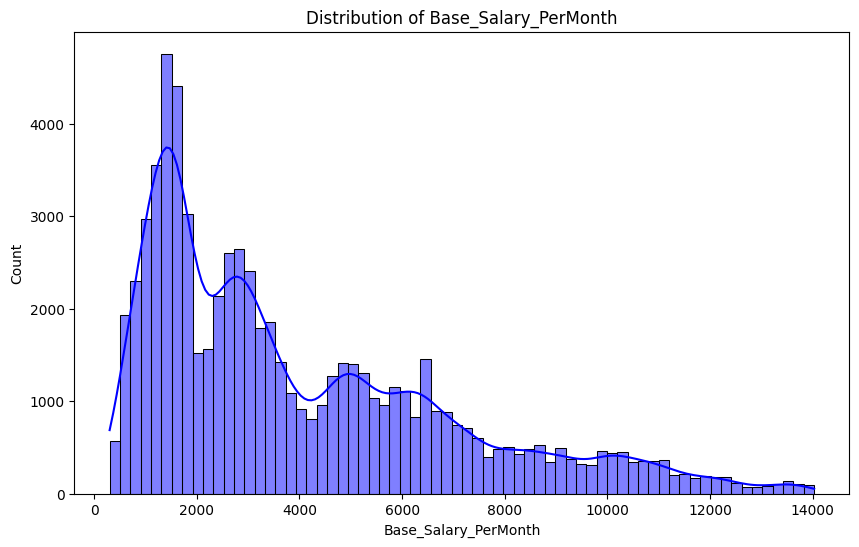

In [446]:
# Remove missing values
df_train['Base_Salary_PerMonth'] = df_train['Base_Salary_PerMonth'].fillna(df_train['Base_Salary_PerMonth'].mode()[0])

# Remove outliers using IQR
df_train['Base_Salary_PerMonth'] = removeOutliers(df_train['Base_Salary_PerMonth'])

plot_numerical(df_train['Base_Salary_PerMonth'])

In [447]:
# EDA on number of bank accounts
describe_numerical(df_train['Total_Bank_Accounts'])


Statistics:
count    70220.000000
mean        17.106508
std        116.333039
min         -1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max       1798.000000
Name: Total_Bank_Accounts, dtype: float64

Mode: 6

Unique values: [   5    4    0    9    7    2    6   10    8    1    3   60  166  955
  540 1089  844   31  932  687   50  672 1310 1620 1480 1481 1637  468
 1069 1631  442 1061  696 1378  137  702 1654  708   87  373 1784 1652
 1501  864  691  425   -1  805  182   83  317  931  335  823 1655  912
  406 1444 1748  681 1114  649 1194 1453   28  201  889  172 1026  803
 1566  997  546  313  179  330 1468 1318 1561  596   39 1765  628  575
  210 1472  525  239  845  786  991 1782  224 1473  563 1494  556  307
 1793 1327  115  850 1676  180 1591  854 1440  820  242 1695 1751  584
  265 1365  288 1502  587  260 1277  421 1424 1426 1783  761  946  505
 1621  448 1733 1349  351 1250  927  999 1288 1252  216  701 1483 1613
 1701 1404  475 1763  808 1779  12

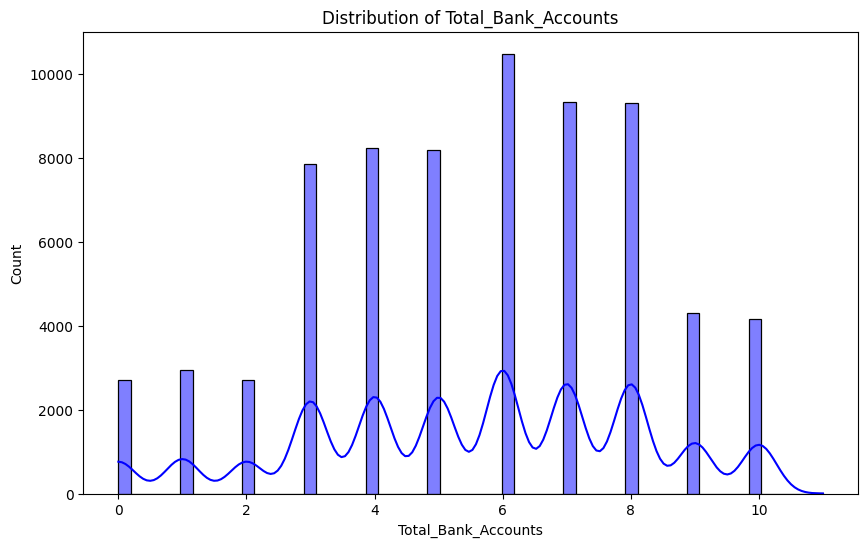

In [448]:
# Remove negative values
df_train = df_train[df_train['Total_Bank_Accounts'] >= 0]

# Replace missing values with mode
df_train['Total_Bank_Accounts'] = df_train['Total_Bank_Accounts'].fillna(df_train['Total_Bank_Accounts'].mode()[0])

# Remove outliers using IQR
df_train['Total_Bank_Accounts'] = removeOutliers(df_train['Total_Bank_Accounts'])

plot_numerical(df_train['Total_Bank_Accounts'])

In [449]:
describe_categorical(df_train['Total_Credit_Cards'])

Unique values: [   7    4    6   10    3    5    8    9    1  852 1100    2 1204  306
  104 1127 1375  269  875  256  531   69  223  448  972  928   11 1356
 1080  419   92  770  794  709 1180 1213  909  837  461  153 1498 1107
 1194 1124 1208   33  338 1343  814   27 1103  924 1261  558   84  573
 1049  994  617  409 1395   46  270  730  381  637  447  579  807 1009
  200 1393  697 1184  428 1130  562  254 1183  496 1387  557  947  554
  320  868 1135  870  291   25 1073  450 1217  204   29  337  238 1436
 1434    0 1270 1357 1403 1106 1358  537  958 1391 1102  235 1164 1269
  776  974  996  305 1319   51 1409  227  758 1122  424 1031 1414  543
  373 1258  535  780 1007  507  881 1242 1478 1165  240  656 1201  251
  304 1245  670   71 1239  536  501 1207 1168  918 1105 1235  502  563
 1177  143  665  436  389 1441  948  838  602  876 1241 1005  756  849
 1450 1459 1313  466  982 1363  299  703  237   61 1461  311  615  170
  363 1116  540 1246 1479 1400  350  633  154  766  300 1466 1

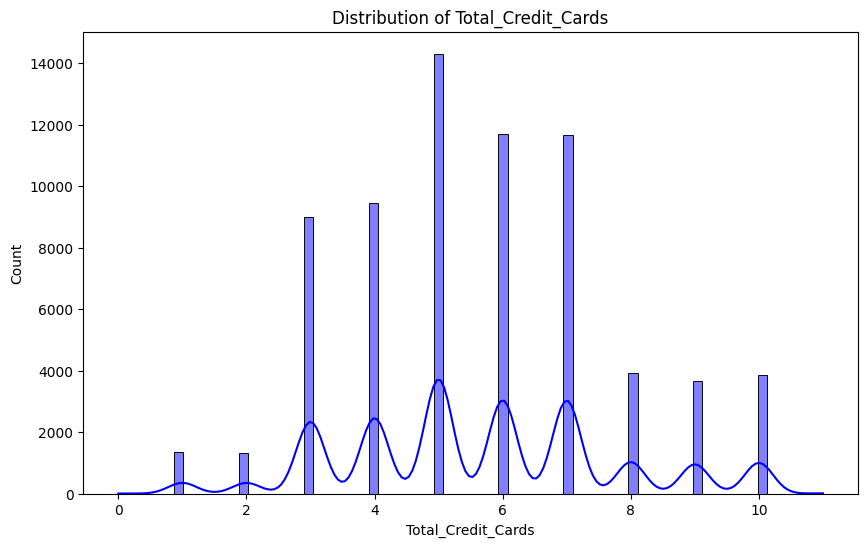

In [450]:
# Replace missing values with mode
df_train['Total_Credit_Cards'] = df_train['Total_Credit_Cards'].fillna(df_train['Total_Credit_Cards'].mode()[0])

# Remove outliers using IQR
df_train['Total_Credit_Cards'] = removeOutliers(df_train['Total_Credit_Cards'])

plot_numerical(df_train['Total_Credit_Cards'])

In [451]:
describe_categorical(df_train['Rate_Of_Interest'])

Unique values: [  10    9    8 ... 3129 1579 1787]
Value counts: Rate_Of_Interest
5       3246
6       3162
8       3132
18      3061
9       3045
        ... 
4503       1
1878       1
5686       1
987        1
2114       1
Name: count, Length: 1291, dtype: int64

Statistics:
count    70209.000000
mean        73.353473
std        468.188079
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max       5797.000000
Name: Rate_Of_Interest, dtype: float64


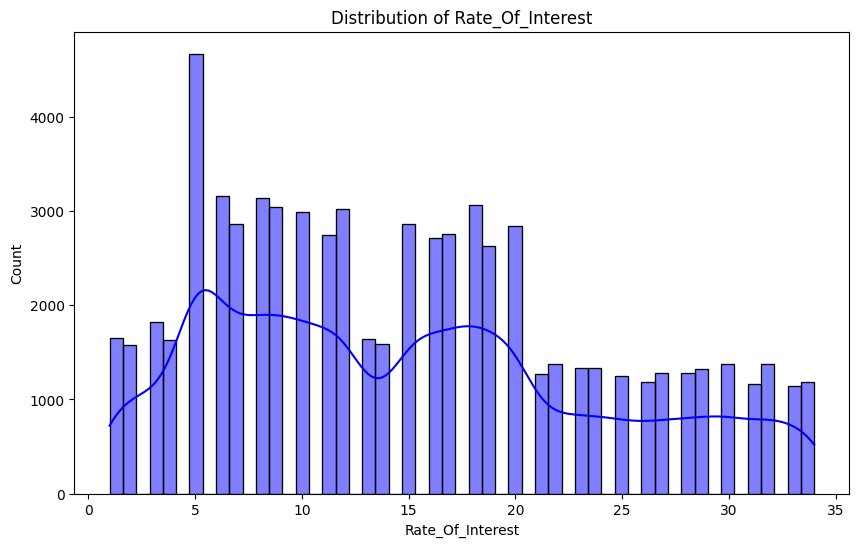

In [452]:
# Replace missing values with mode
df_train['Rate_Of_Interest'] = df_train['Rate_Of_Interest'].fillna(df_train['Rate_Of_Interest'].mode()[0])

# Remove outliers using IQR
df_train['Rate_Of_Interest'] = removeOutliers(df_train['Rate_Of_Interest'])
plot_numerical(df_train['Rate_Of_Interest'])

In [453]:
describe_categorical(df_train["Total_Current_Loans"])

Unique values: ['4_' '1' '3' '5' '9_' '-100' '4' '9' '2' '7' '6' '8' '1_' '3_' '6_' '27_'
 '5_' '172' '430' '574' '1484' '7_' '2_' '527_' '1461' '8_' '192' '1112'
 '1354' '1271' '931' '1406' '781' '1259' '392' '288' '138' '280' '663'
 '809' '70' '95' '927' '65' '1236' '201' '1289' '601' '728' '733' '1228'
 '745' '1311_' '983' '1214' '1110' '1459_' '630_' '137' '773' '716' '1091'
 '1439' '1300' '1353' '581' '1294' '52' '174' '31' '1307' '1265' '1040'
 '89' '497' '351' '991' '254' '216' '1320_' '464' '1202' '292' '545' '597'
 '1496' '696' '1014' '1433' '147' '1441' '282' '640' '365' '1131' '1154'
 '785_' '895' '1088' '1217' '466' '1371' '190' '699' '143_' '1365' '955'
 '504' '196' '719' '1329' '526' '1182' '1348' '936' '816' '966' '447'
 '945' '1241' '1384' '1131_' '1463' '157' '952' '359' '23' '1127' '54'
 '1178' '1480' '387' '1470' '1015' '1457' '795' '1387' '1054' '1053'
 '1465' '418' '926' '967' '1359' '229' '891' '657' '146' '148' '492'
 '1464' '910' '1159' '1320' '405' '227_' '814'

In [454]:
# Remove _ from Total_Current_Loans
df_train["Total_Current_Loans"] = df_train["Total_Current_Loans"].str.replace('_', '', regex=True)

# Replace missing values with mode
df_train["Total_Current_Loans"] = df_train["Total_Current_Loans"].fillna(df_train["Total_Current_Loans"].mode()[0])

# Convert Total_Current_Loans to numeric
df_train["Total_Current_Loans"] = pd.to_numeric(df_train["Total_Current_Loans"])

describe_numerical(df_train["Total_Current_Loans"])


Statistics:
count    70209.000000
mean         3.602188
std         64.173910
min       -100.000000
25%          2.000000
50%          3.000000
75%          6.000000
max       1496.000000
Name: Total_Current_Loans, dtype: float64

Mode: 3

Unique values: [   4    1    3    5    9 -100    2    7    6    8   27  172  430  574
 1484  527 1461  192 1112 1354 1271  931 1406  781 1259  392  288  138
  280  663  809   70   95  927   65 1236  201 1289  601  728  733 1228
  745 1311  983 1214 1110 1459  630  137  773  716 1091 1439 1300 1353
  581 1294   52  174   31 1307 1265 1040   89  497  351  991  254  216
 1320  464 1202  292  545  597 1496  696 1014 1433  147 1441  282  640
  365 1131 1154  785  895 1088 1217  466 1371  190  699  143 1365  955
  504  196  719 1329  526 1182 1348  936  816  966  447  945 1241 1384
 1463  157  952  359   23 1127   54 1178 1480  387 1470 1015 1457  795
 1387 1054 1053 1465  418  926  967 1359  229  891  657  146  148  492
 1464  910 1159  405  227  814 141


Statistics:
count    70209.000000
mean         3.943825
std          2.184953
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Total_Current_Loans, dtype: float64

Mode: 3

Unique values: [4 1 3 5 9 2 7 6 8]


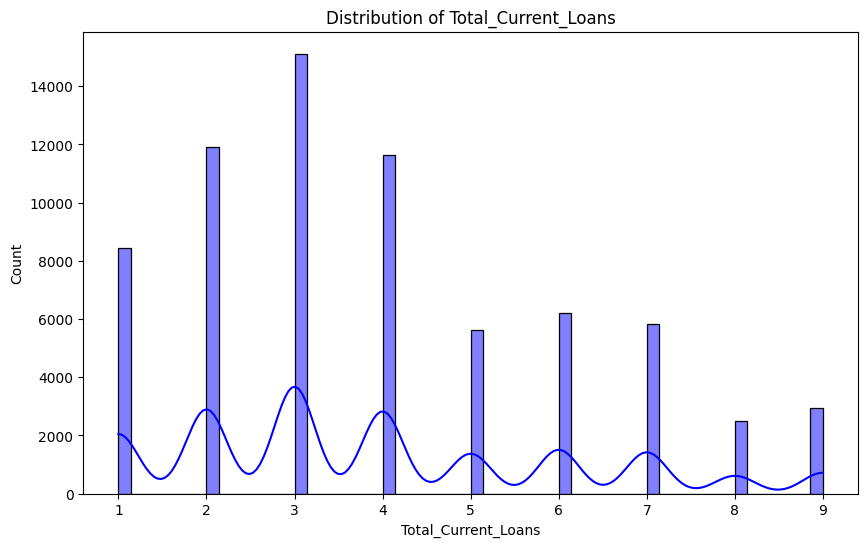

In [455]:
# Remove outliers using IQR
df_train["Total_Current_Loans"] = removeOutliers(df_train["Total_Current_Loans"])
describe_numerical(df_train["Total_Current_Loans"])
plot_numerical(df_train["Total_Current_Loans"])

In [456]:
describe_numerical(df_train['Delay_from_due_date'])


Statistics:
count    70209.00000
mean        22.01544
std         15.23393
min         -5.00000
25%         10.00000
50%         19.00000
75%         29.00000
max         67.00000
Name: Delay_from_due_date, dtype: float64

Mode: 15

Unique values: [ 8 13 15 28 27 46 25 16  5 24 23 60 40 58 62 56 35  1 17 42 11 12 59 14
  6 36 21 18  9 20 26 10  7  2 38  4 29 50 54  3  0 22 31 47 49 19 39 30
 32 51 41 34 33 43 61 53 57 45 55 52 -2 -5 48 37 -3 64 44 63 66 -4 -1 65
 67]


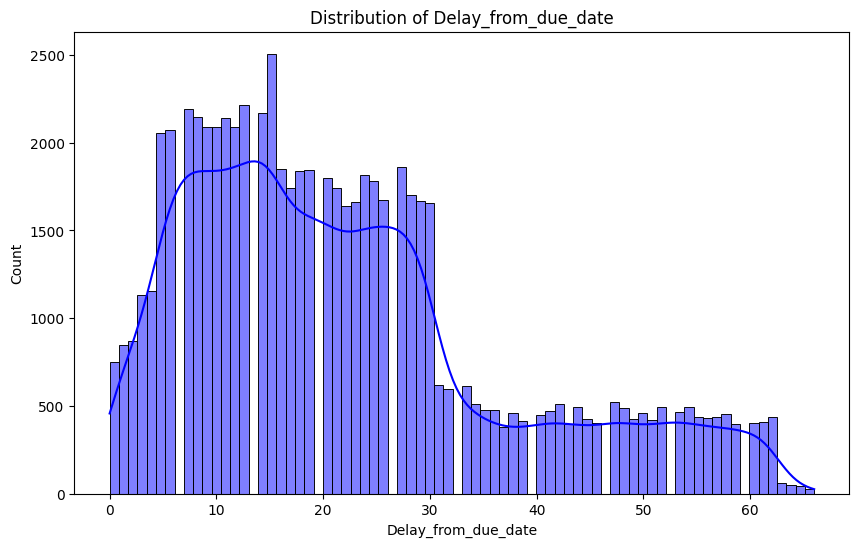

In [457]:
# Remove negative values
df_train = df_train[df_train['Delay_from_due_date'] >= 0]

# Replace missing values with mode
df_train['Delay_from_due_date'] = df_train['Delay_from_due_date'].fillna(df_train['Delay_from_due_date'].mode()[0])

# Remove outliers using IQR
df_train['Delay_from_due_date'] = removeOutliers(df_train['Delay_from_due_date'])
plot_numerical(df_train['Delay_from_due_date'])

In [458]:
describe_categorical(df_train['Total_Delayed_Payments'])

Unique values: ['8' '9' '2' '12' '16' '15' '11' '22' '19' '23' '14' '1' '17' '20' '21'
 '10' '6' '13' '4' '18' '24' '3536' '9_' '12_' '3' '5' '13_' '7' '27' '28'
 '-3' '16_' '25' '8_' '2801' '21_' '7_' '17_' '19_' '2311' '0' '10_' '-1_'
 '20_' '18_' '3827' '2671' '2001' '23_' '2_' '1633' '4_' '22_' '2621' '-1'
 '1531' '3447' '5_' '4231' '1181' '-2' '6_' '11_' '3488' '15_' '2697'
 '3559' '3069' '26' '25_' '1154' '14_' '24_' '0_' '2553' '3200' '3_'
 '3623' '3119' '2950' '4053' '1636' '2056' '4096' '1766' '1_' '3274'
 '2397' '662' '708' '3880' '3955' '2280' '1572' '1953' '3050' '2044' '559'
 '1243' '1994' '4135' '271' '4239' '1841' '4278' '3861_' '2810' '3484'
 '819' '3511' '1749' '3216' '3260' '1691' '441' '4002' '1647' '2503'
 '4216' '2006' '1890' '1473_' '4126' '221' '3739' '3142' '1338' '905'
 '1976' '2508' '2875' '-2_' '2812' '3951' '876' '3391' '847' '4311' '3815'
 '3870' '130' '2185' '1371' '497' '1392' '2376' '853' '867' '1900' '2677'
 '1473' '3112' '1354' '1015' '27_' '2544' '106

In [459]:
# Remove _ from Total_Delayed_Payments
df_train['Total_Delayed_Payments'] = df_train['Total_Delayed_Payments'].str.replace('_', '', regex=True)

# Convert Total_Delayed_Payments to numeric
df_train['Total_Delayed_Payments'] = pd.to_numeric(df_train['Total_Delayed_Payments'])

In [460]:
describe_numerical(df_train['Total_Delayed_Payments'])


Statistics:
count    69843.000000
mean        30.464986
std        221.716111
min         -3.000000
25%          9.000000
50%         14.000000
75%         19.000000
max       4397.000000
Name: Total_Delayed_Payments, dtype: float64

Mode: 19

Unique values: [   8    9    2   12   16   15   11   22   19   23   14    1   17   20
   21   10    6   13    4   18   24 3536    3    5    7   27   28   -3
   25 2801 2311    0   -1 3827 2671 2001 1633 2621 1531 3447 4231 1181
   -2 3488 2697 3559 3069   26 1154 2553 3200 3623 3119 2950 4053 1636
 2056 4096 1766 3274 2397  662  708 3880 3955 2280 1572 1953 3050 2044
  559 1243 1994 4135  271 4239 1841 4278 3861 2810 3484  819 3511 1749
 3216 3260 1691  441 4002 1647 2503 4216 2006 1890 1473 4126  221 3739
 3142 1338  905 1976 2508 2875 2812 3951  876 3391  847 4311 3815 3870
  130 2185 1371  497 1392 2376  853  867 1900 2677 3112 1354 1015 2544
 1061 3031 2276 3749   52 3864 2591 3316 4298 3467 3010  238 1706 1663
  416 4144 2243 2751 4251 2141

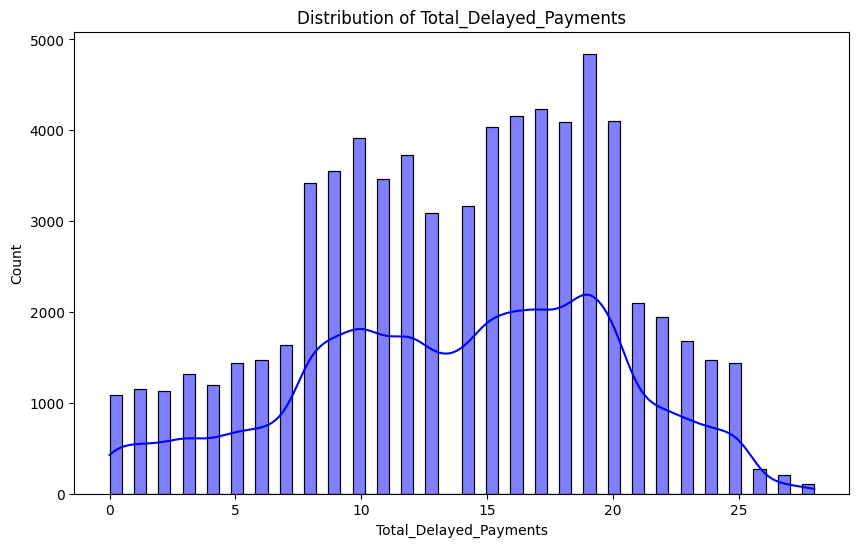

In [461]:
# Remove outliers using IQR
df_train['Total_Delayed_Payments'] = removeOutliers(df_train['Total_Delayed_Payments'])

# Remove negative values
df_train = df_train[df_train['Total_Delayed_Payments'] >= 0]

plot_numerical(df_train['Total_Delayed_Payments'])

In [462]:
describe_categorical(df_train['Credit_Limit'])

Unique values: ['2.89' '10.26' '1.17' ... '22.25' '26.38' '12.420000000000002']
Value counts: Credit_Limit
_                     1465
8.22                   105
11.5                   103
11.32                   92
7.69                    83
                      ... 
1.3000000000000007       1
-3.85                    1
23.4                     1
-5.78                    1
8.469999999999999        1
Name: count, Length: 4070, dtype: int64

Statistics:
count     69427
unique     4070
top           _
freq       1465
Name: Credit_Limit, dtype: object


In [463]:
# Remove _ from Credit_Limit
df_train['Credit_Limit'] = df_train['Credit_Limit'].str.replace('_', '', regex=True)

# Convert Credit_Limit to numeric
df_train['Credit_Limit'] = pd.to_numeric(df_train['Credit_Limit'])

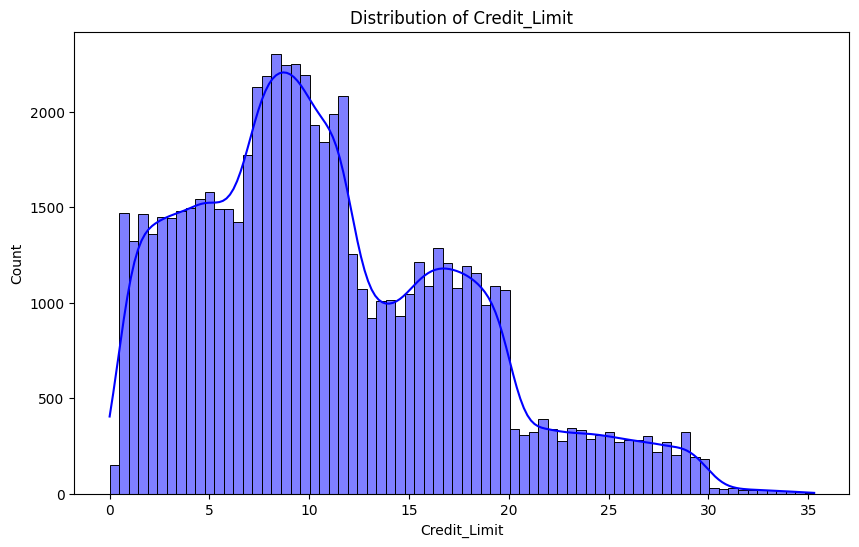

In [464]:
# Remove outliers using IQR
df_train['Credit_Limit'] = removeOutliers(df_train['Credit_Limit'])
# Remove -ve values
df_train = df_train[df_train['Credit_Limit'] >= 0]
plot_numerical(df_train['Credit_Limit'])

In [465]:
describe_numerical(df_train['Total_Credit_Enquiries'])


Statistics:
count    66941.000000
mean        27.983493
std        192.315045
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Total_Credit_Enquiries, dtype: float64

Mode: 4.0

Unique values: [5.000e+00 6.000e+00 4.000e+00 1.000e+00 8.000e+00 3.000e+00 9.000e+00
 7.000e+00 1.768e+03 1.000e+01 2.000e+00 0.000e+00 1.100e+01 1.700e+01
 1.600e+01 1.400e+01 1.200e+01 5.280e+02 1.300e+01 1.500e+01 3.300e+01
 3.090e+02 2.155e+03 1.340e+03 2.324e+03 1.344e+03 1.309e+03 1.216e+03
 2.389e+03 2.274e+03 1.113e+03 1.366e+03 1.103e+03 1.788e+03 1.475e+03
 8.240e+02 2.502e+03 1.581e+03 1.350e+02 5.860e+02 1.197e+03 9.870e+02
 1.761e+03 2.458e+03 1.380e+03 2.331e+03 6.120e+02 1.680e+02 8.370e+02
 2.351e+03 2.520e+02 7.770e+02 1.329e+03 9.570e+02 4.210e+02 2.049e+03
 2.284e+03 6.200e+02 1.803e+03 2.120e+02 6.790e+02 1.860e+02 2.374e+03
 9.840e+02 2.505e+03 2.433e+03 8.460e+02 5.660e+02 2.370e+03 5.300e+01
 2.161e+03 2.254e+03 1.980e+0

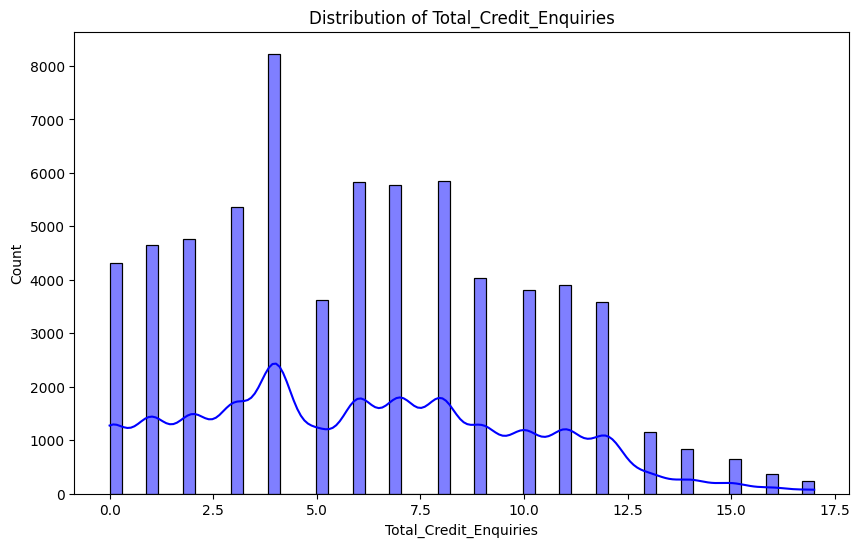

In [466]:
# Remove outliers using IQR
df_train['Total_Credit_Enquiries'] = removeOutliers(df_train['Total_Credit_Enquiries'])

# Remove negative values
df_train = df_train[df_train['Total_Credit_Enquiries'] >= 0]

plot_numerical(df_train['Total_Credit_Enquiries'])

In [467]:
describe_categorical(df_train["Current_Debt_Outstanding"])

Unique values: ['50.93' '1058' '576.48' ... '1938.26_' '601.76_' '303.23_']
Value counts: Current_Debt_Outstanding
1109.03     19
1360.45     19
460.46      17
1298.38     16
4453.51     16
            ..
891.96_      1
431.39_      1
1178.78_     1
4648.32_     1
2077.81_     1
Name: count, Length: 11531, dtype: int64

Statistics:
count       66941
unique      11531
top       1109.03
freq           19
Name: Current_Debt_Outstanding, dtype: object


In [468]:
# Remove _ from Current_Debt_Outstanding
df_train['Current_Debt_Outstanding'] = df_train['Current_Debt_Outstanding'].str.replace('_', '', regex=True)

# Convert Current_Debt_Outstanding to numeric
df_train['Current_Debt_Outstanding'] = pd.to_numeric(df_train['Current_Debt_Outstanding'])

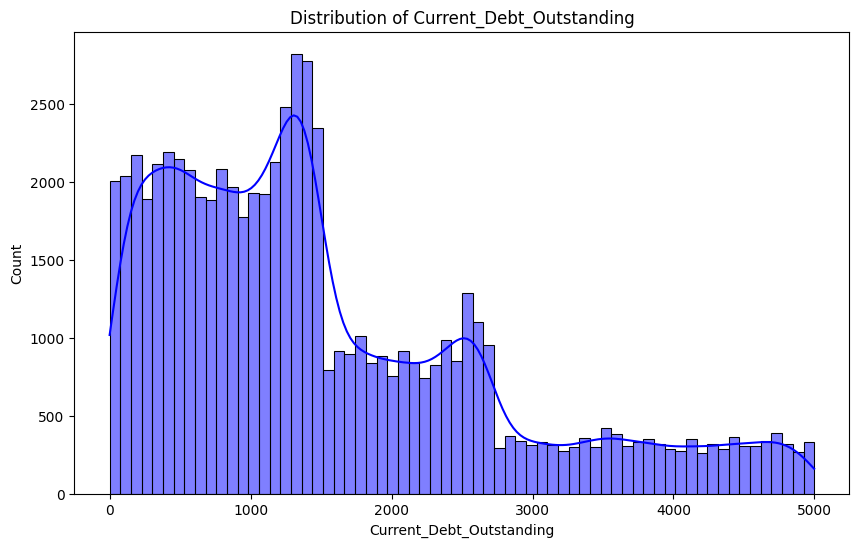

In [469]:
# Remove outliers using IQR
df_train['Current_Debt_Outstanding'] = removeOutliers(df_train['Current_Debt_Outstanding'])

# Remove negative values
df_train = df_train[df_train['Current_Debt_Outstanding'] >= 0]

plot_numerical(df_train['Current_Debt_Outstanding'])

In [470]:
describe_numerical(df_train["Ratio_Credit_Utilization"])


Statistics:
count    66941.000000
mean        32.141134
std          5.072030
min         20.000000
25%         27.936600
50%         32.165804
75%         36.341004
max         49.564519
Name: Ratio_Credit_Utilization, dtype: float64

Mode: 20.0

Unique values: [34.46215408 39.69381187 39.36722456 ... 25.08617646 33.94409413
 32.19504406]


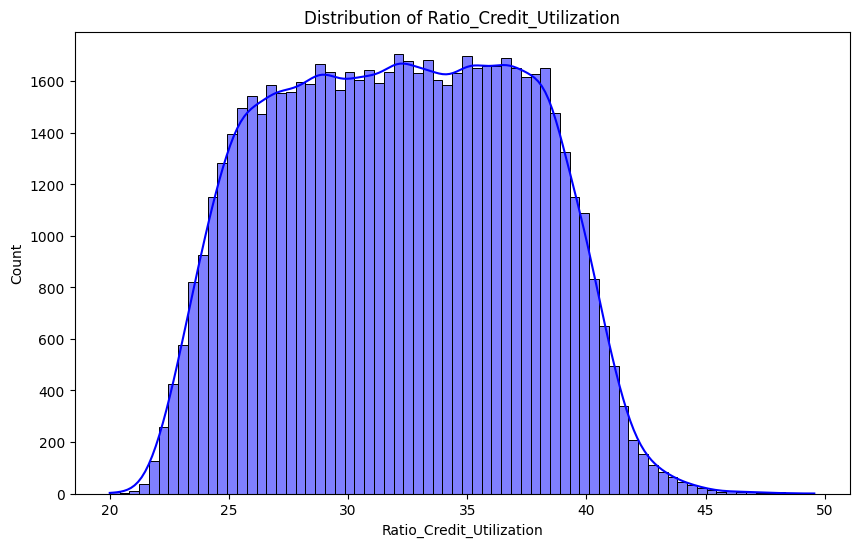

In [471]:
# Remove outliers using IQR
df_train['Ratio_Credit_Utilization'] = removeOutliers(df_train['Ratio_Credit_Utilization'])

plot_numerical(df_train['Ratio_Credit_Utilization'])

In [472]:
describe_categorical(df_train["Credit_History_Age"])

Unique values: ['24 Years and 1 Months' '20 Years and 5 Months' '19 Years and 0 Months'
 '17 Years and 1 Months' '4 Years and 6 Months' '24 Years and 11 Months'
 '17 Years and 10 Months' '28 Years and 1 Months' '21 Years and 6 Months'
 '0 Years and 10 Months' '22 Years and 5 Months' '19 Years and 8 Months'
 '15 Years and 8 Months' '12 Years and 0 Months' '3 Years and 5 Months'
 '7 Years and 2 Months' '15 Years and 11 Months' '7 Years and 0 Months'
 '5 Years and 10 Months' '12 Years and 5 Months' '28 Years and 11 Months'
 '29 Years and 9 Months' '19 Years and 1 Months' '30 Years and 9 Months'
 '6 Years and 0 Months' '30 Years and 6 Months' '4 Years and 0 Months'
 '10 Years and 1 Months' '16 Years and 5 Months' '12 Years and 9 Months'
 '10 Years and 7 Months' '9 Years and 9 Months' '6 Years and 5 Months'
 '31 Years and 10 Months' '9 Years and 8 Months' '10 Years and 2 Months'
 '2 Years and 6 Months' '23 Years and 8 Months' '19 Years and 9 Months'
 '25 Years and 6 Months' '6 Years and 1 M

In [473]:
# Remove 'Unknown'
df_train = df_train[df_train['Credit_History_Age'] != 'Unknown']

In [474]:
def ageConvertor(x):
    if pd.notnull(x) and isinstance(x, str):
        years = x.split(' ')[0]
        months = x.split(' ')[3]
        return int(years) * 12 + int(months)
    else:
        return x

# Convert Credit_History_Age to numeric
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(ageConvertor)

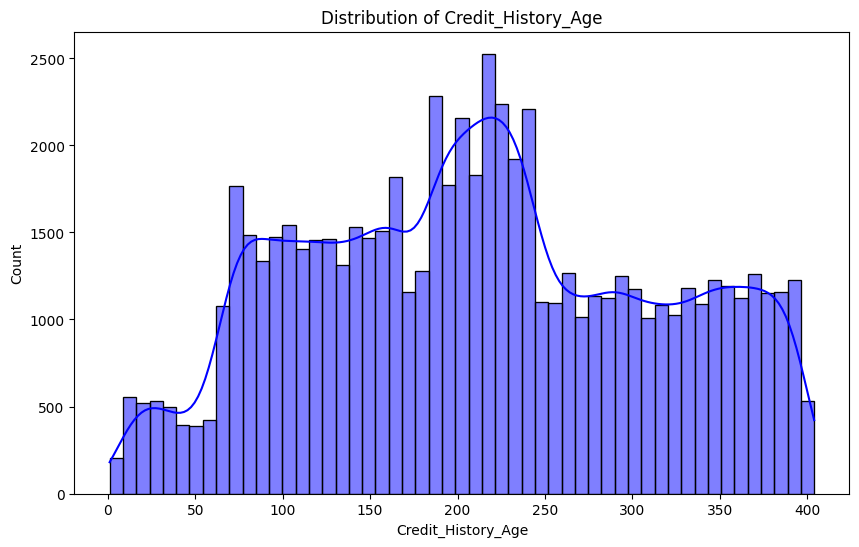

In [475]:
# Remove outliers using IQR
df_train['Credit_History_Age'] = removeOutliers(df_train['Credit_History_Age'])

plot_numerical(df_train['Credit_History_Age'])

In [476]:
describe_numerical(df_train["Per_Month_EMI"])


Statistics:
count    66941.000000
mean      1415.400784
std       8287.292996
min          4.462837
25%         41.633626
50%         79.047610
75%        172.247456
max      82331.000000
Name: Per_Month_EMI, dtype: float64

Mode: 4.4628374669131645

Unique values: [  190.81101712    70.58768071    86.90586037 ...   109.52411247
 33545.          7352.        ]


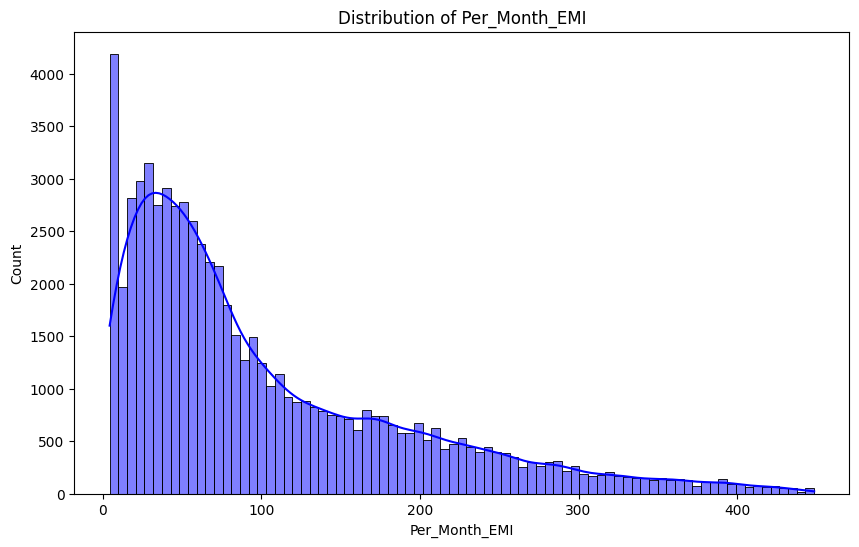

In [477]:
# Replace missing values with mode
df_train['Per_Month_EMI'] = df_train['Per_Month_EMI'].fillna(df_train['Per_Month_EMI'].mode()[0])

# Remove outliers using IQR
df_train['Per_Month_EMI'] = removeOutliers(df_train['Per_Month_EMI'])

plot_numerical(df_train['Per_Month_EMI'])

In [478]:
describe_categorical(df_train["Monthly_Investment"])

Unique values: ['630.0157894388726' '662.8039273360225' '746.8059854204569' ...
 '106.73567925309915' '567.1798727916067' '219.89003507274796']
Value counts: Monthly_Investment
__10000__             3015
0                      161
15.224084446617251       4
147.1773205671738        4
139.6067977              4
                      ... 
48.81086003036982        1
331.2663555107514        1
209.00389352053054       1
94.41093323235712        1
246.9808965874072        1
Name: count, Length: 60973, dtype: int64

Statistics:
count         66941
unique        60973
top       __10000__
freq           3015
Name: Monthly_Investment, dtype: object



Statistics:
count    66941.000000
mean       941.638917
std       2661.865271
min          0.000000
25%         73.754016
50%        130.776302
75%        249.687931
max      10000.000000
Name: Monthly_Investment, dtype: float64

Mode: 10000.0

Unique values: [  630.01578944   662.80392734 10000.         ...   106.73567925
   567.17987279   219.89003507]


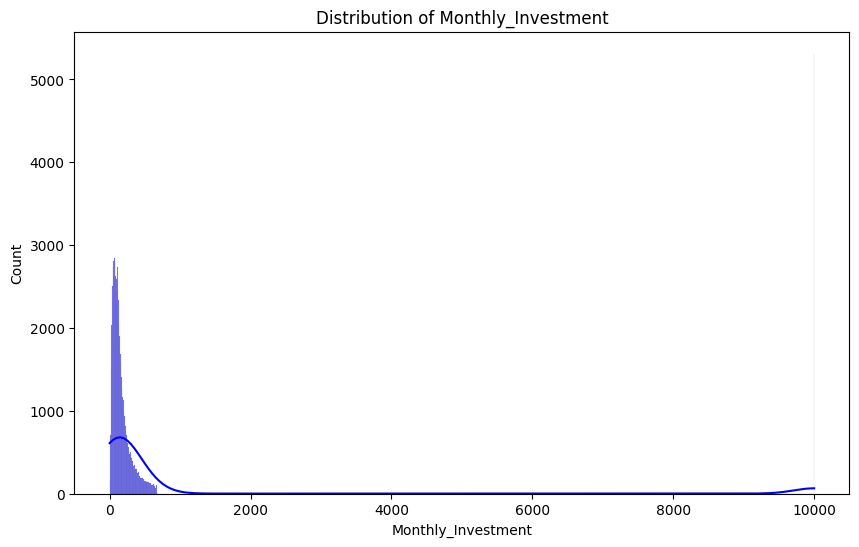

In [479]:
# Remove _ from Monthly_Investment
df_train['Monthly_Investment'] = df_train['Monthly_Investment'].str.replace('_', '', regex=True)

# Replace missing values with mode
df_train['Monthly_Investment'] = df_train['Monthly_Investment'].fillna(df_train['Monthly_Investment'].mode()[0])

# Convert Monthly_Investment to numeric
df_train['Monthly_Investment'] = pd.to_numeric(df_train['Monthly_Investment'])

# Remove outliers using IQR
df_train['Monthly_Investment'] = removeOutliers(df_train['Monthly_Investment'], 0.2, 0.8)


describe_numerical(df_train["Monthly_Investment"])
plot_numerical(df_train['Monthly_Investment'])

In [480]:
describe_categorical(df_train["Monthly_Balance"])

Unique values: ['314.0021934422197' '410.1996419555151' '742.5141542054829' ...
 318.1030567807077 643.0235177948541 858.2811773285913]
Value counts: Monthly_Balance
__-333333333333333333333333333__    7
724.2197332217011                   5
244.99107777431962                  5
214.19064243506054                  4
212.44492522535438                  4
                                   ..
57.73234509311243                   1
233.83609398942028                  1
518.6638172731967                   1
342.7054172095593                   1
250.5688912662896                   1
Name: count, Length: 66093, dtype: int64

Statistics:
count                                66941
unique                               66093
top       __-333333333333333333333333333__
freq                                     7
Name: Monthly_Balance, dtype: object


In [481]:
# Remove _ from Monthly_Balance
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].str.replace('_', '', regex=True)

# Convert Monthly_Balance to numeric
df_train['Monthly_Balance'] = pd.to_numeric(df_train['Monthly_Balance'], errors='coerce')

describe_numerical(df_train["Monthly_Balance"])


Statistics:
count    5.499300e+04
mean    -4.242964e+22
std      3.760541e+24
min     -3.333333e+26
25%      2.638382e+02
50%      3.239223e+02
75%      4.420102e+02
max      1.552946e+03
Name: Monthly_Balance, dtype: float64

Mode: -3.333333333333333e+26

Unique values: [314.00219344 410.19964196 742.51415421 ... 101.9973726  248.77519122
 156.65289966]


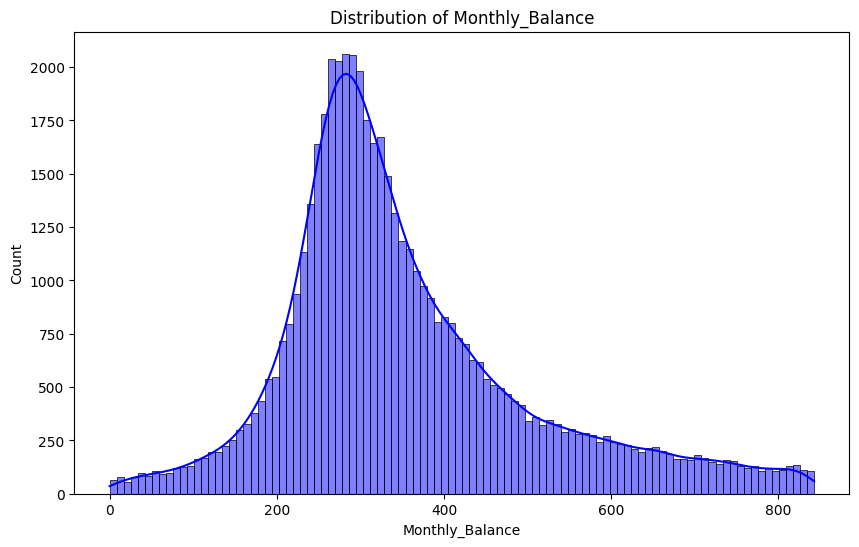

In [482]:
# Remove outliers using IQR
df_train['Monthly_Balance'] = removeOutliers(df_train['Monthly_Balance'])

# Remove negative values
df_train = df_train[df_train['Monthly_Balance'] >= 0]

plot_numerical(df_train['Monthly_Balance'])

/tmp/ipykernel_3370/3715493365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y=col, data=df_train, ax=axes[i], palette='viridis')
/tmp/ipykernel_3370/3715493365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y=col, data=df_train, ax=axes[i], palette='viridis')
/tmp/ipykernel_3370/3715493365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y=col, data=df_train, ax=axes[i], palette='viridis')
/tmp/ipykernel_3370/3715493365.py:7: FutureWarning: 

Passing `palette` without assig

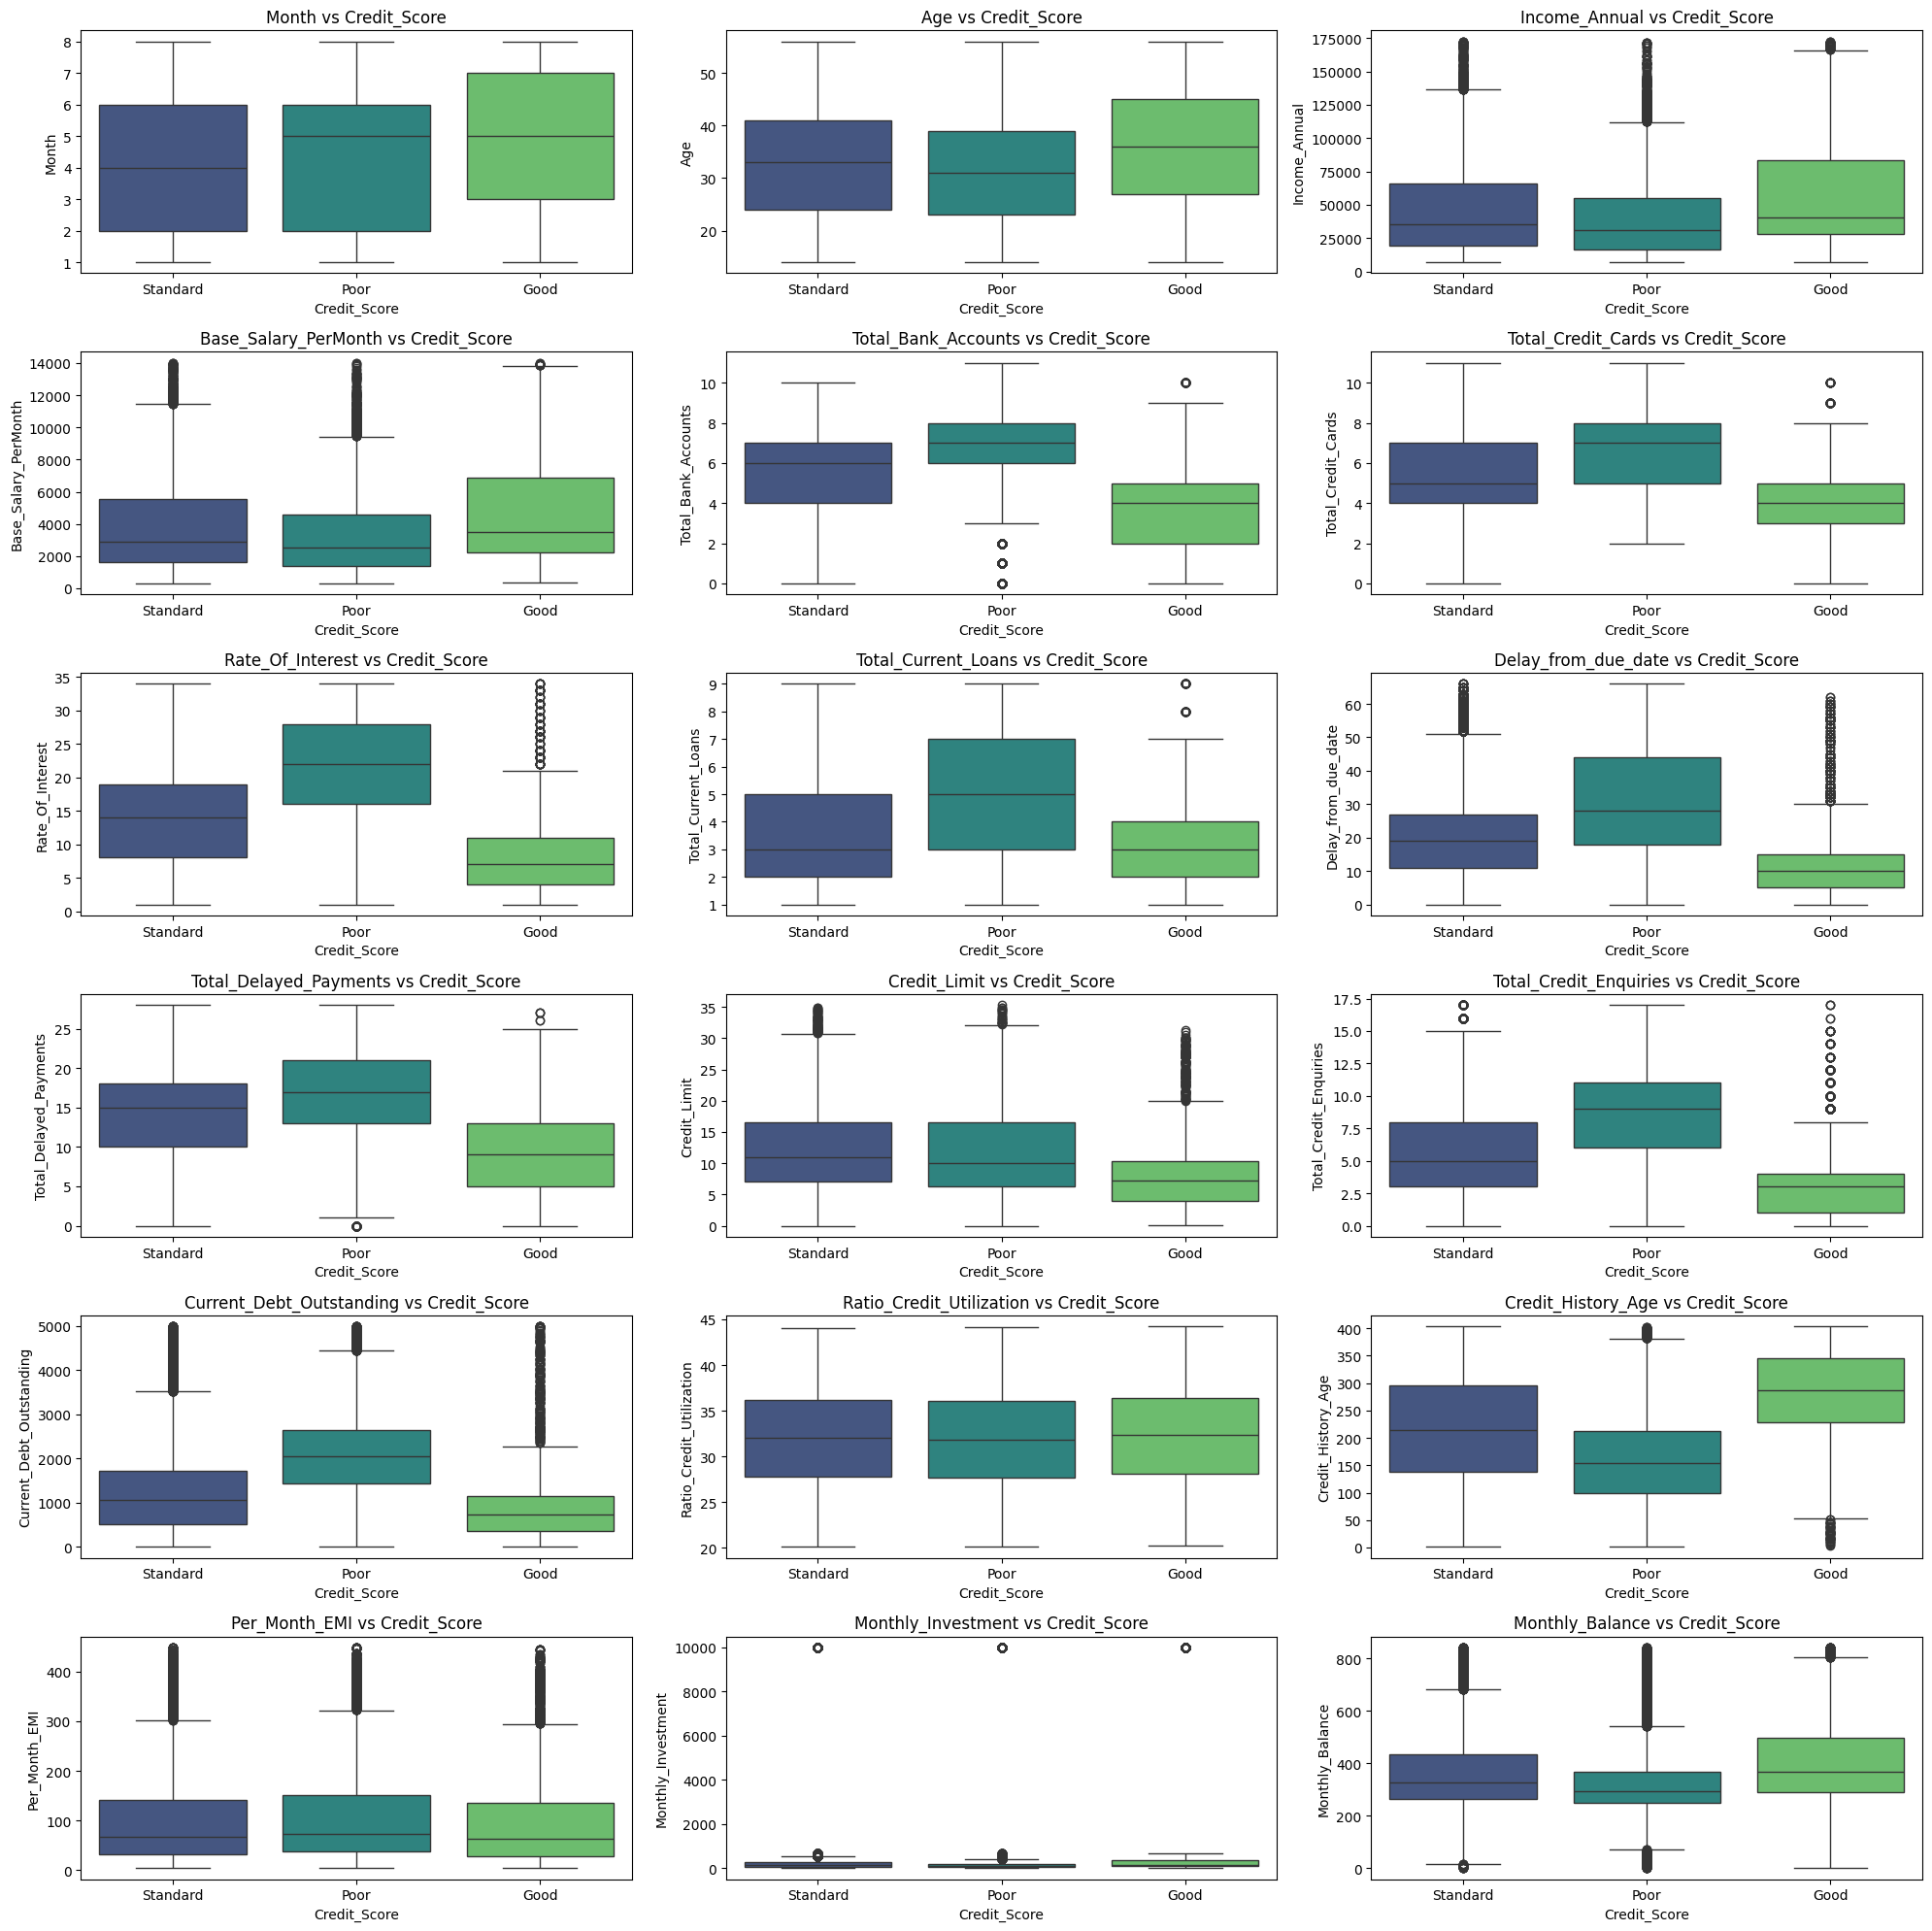

In [483]:
numerical_features = df_train.select_dtypes(include=[np.number]).columns

# Create plots for numerical features with Credit_Score
fig, axes = plt.subplots(6, 3, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x='Credit_Score', y=col, data=df_train, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Credit_Score')
    axes[i].set_xlabel('Credit_Score')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

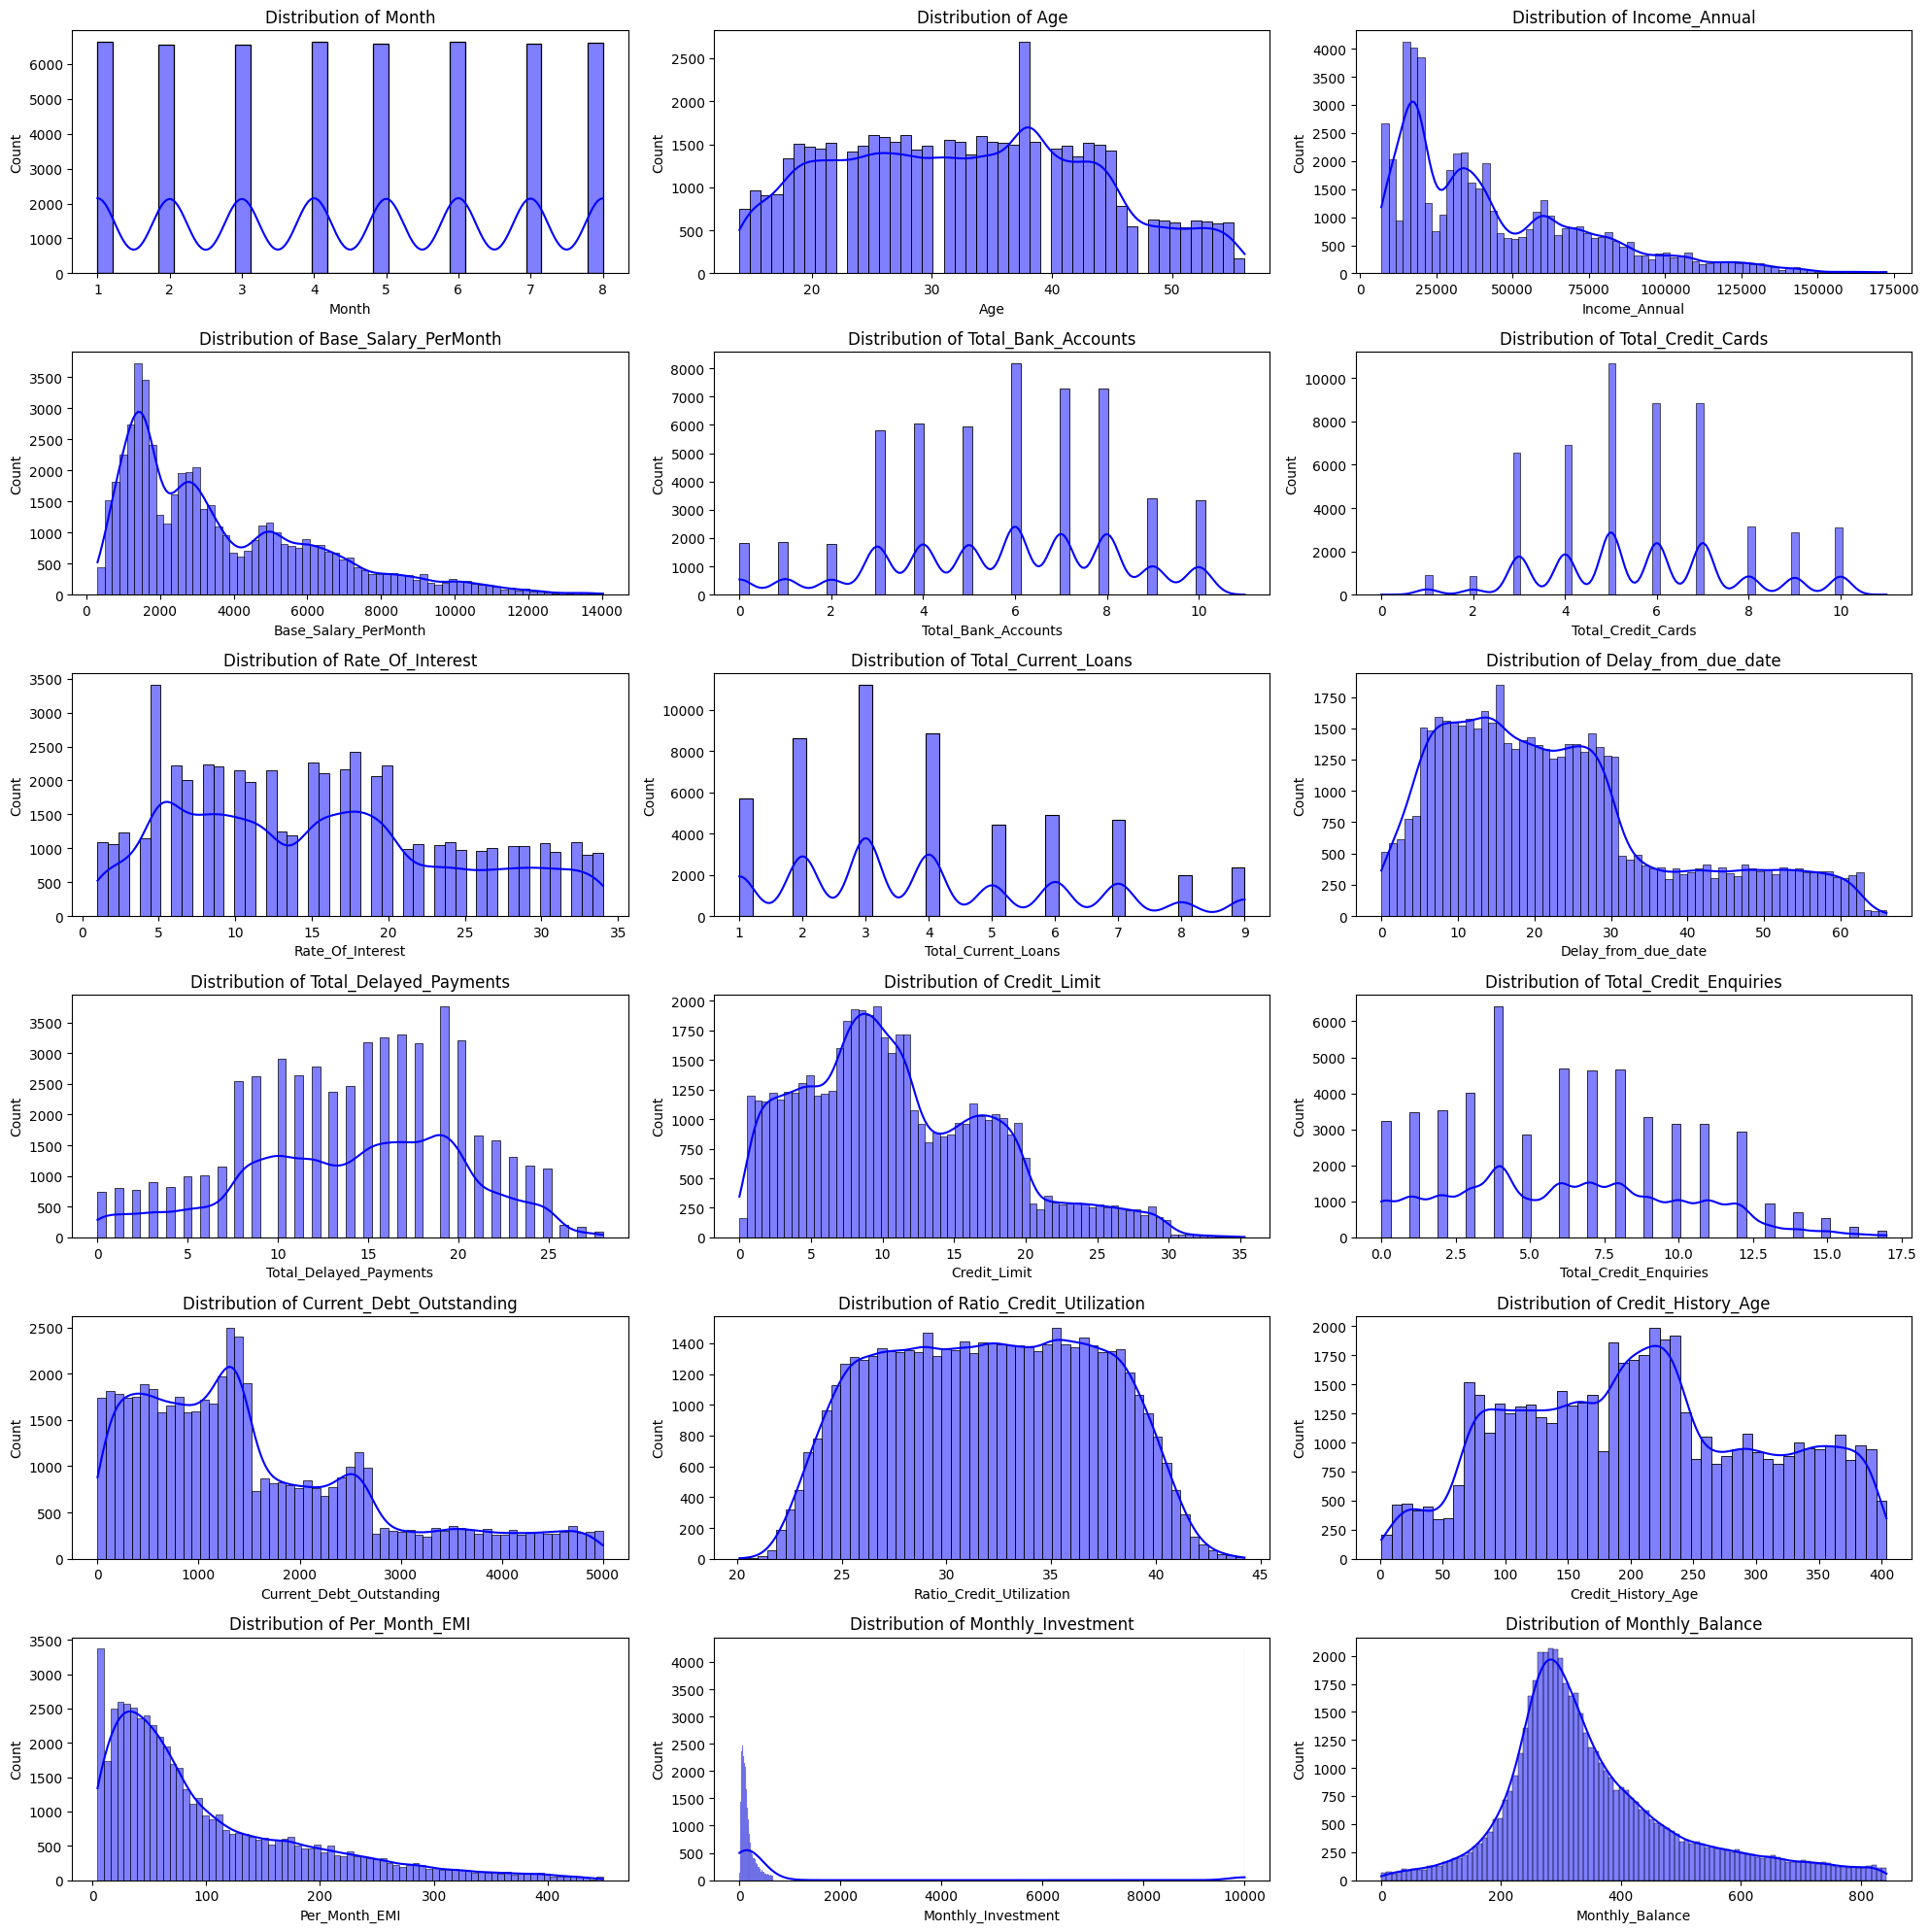

In [484]:
# Create plots for distribution of numerical features 
fig, axes = plt.subplots(6, 3, figsize=(20, 20))

axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(df_train[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [485]:
describe_numerical(df_train["Monthly_Investment"])


Statistics:
count    52742.000000
mean       950.549733
std       2678.970440
min          0.000000
25%         71.910867
50%        128.277772
75%        247.288824
max      10000.000000
Name: Monthly_Investment, dtype: float64

Mode: 10000.0

Unique values: [  630.01578944   662.80392734 10000.         ...   541.98821868
   542.03135968   582.06107714]


In [486]:
df_train.describe()

,Month,Age,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,Delay_from_due_date,Total_Delayed_Payments,Credit_Limit,Total_Credit_Enquiries,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Per_Month_EMI,Monthly_Investment,Monthly_Balance
count,52742.000000,52742.000000,52742.000000,52742.000000,52742.000000,52742.000000,52742.000000,52742.000000,52742.00000,52742.000000,52742.000000,52742.000000,52742.00000,52742.000000,52742.000000,52742.000000,52742.000000,52742.000000
mean,4.502503,32.827121,44570.083337,3706.073330,5.666395,5.696542,15.459501,4.048254,22.68253,14.131887,11.136224,6.248625,1556.86191,31.979066,208.014220,100.540343,950.549733,354.851870
std,2.292392,10.531271,32384.741799,2691.881837,2.531863,2.073012,8.897145,2.195167,15.25671,6.084080,6.798461,3.879484,1208.89127,5.005985,99.539543,90.969554,2678.970440,151.049273
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.23000,20.100770,1.000000,4.462837,0.000000,0.088628
25%,3.000000,24.000000,18413.130000,1538.372083,4.000000,4.000000,8.000000,2.000000,11.00000,10.000000,6.030000,3.000000,629.75000,27.793238,129.000000,34.318058,71.910867,261.347289
50%,5.000000,33.000000,34978.290000,2893.878333,6.000000,6.000000,15.000000,4.000000,20.00000,15.000000,9.980000,6.000000,1280.01000,32.011653,205.000000,67.965937,128.277772,318.392271
75%,7.000000,41.000000,62956.560000,5315.060625,8.000000,7.000000,21.000000,6.000000,30.00000,19.000000,15.810000,9.000000,2232.91750,36.152014,285.000000,143.526826,247.288824,420.275753
max,8.000000,56.000000,172534.160000,14025.450000,11.000000,11.000000,34.000000,9.000000,66.00000,28.000000,35.300000,17.000000,4998.07000,44.249734,404.000000,448.512862,10000.000000,842.862818


In [487]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52742 entries, 0 to 79970
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        52742 non-null  object 
 1   Customer_ID               52742 non-null  object 
 2   Month                     52742 non-null  int32  
 3   Name                      52742 non-null  object 
 4   Age                       52742 non-null  int64  
 5   Number                    49784 non-null  object 
 6   Profession                52742 non-null  object 
 7   Income_Annual             52742 non-null  float64
 8   Base_Salary_PerMonth      52742 non-null  float64
 9   Total_Bank_Accounts       52742 non-null  int64  
 10  Total_Credit_Cards        52742 non-null  int64  
 11  Rate_Of_Interest          52742 non-null  int64  
 12  Total_Current_Loans       52742 non-null  int64  
 13  Delay_from_due_date       52742 non-null  int64  
 14  Total_Delay

In [488]:
# Drop columns ID, Name, Customer_ID, Number
df_train.drop(['ID', 'Name', 'Customer_ID', 'Number'], axis=1, inplace=True)

In [489]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = df_train.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le
    # print(f"{col}: {label_encoders[col].classes_}")

In [490]:
#Spli Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']

In [491]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [492]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [493]:
# Do grid search CV on xgboost using F1 score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# # param_grid = {
# #     'max_depth': [3, 5, 7],
# #     'n_estimators': [50, 150, 250],
# #     'learning_rate': [0.01, 0.2, 0.5]
# # }

# param_grid = {
#     'max_depth': [5],
#     'n_estimators': [150],
#     'learning_rate': [0.3]
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

In [494]:
# # Test the best model
# xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
# xgb_model.fit(X_train, y_train)
# y_pred = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [ ]:
# # Test random forest with grid search
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 15],
# }

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10],
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 150}


In [496]:
# # Test the best model
# rf = RandomForestClassifier(**grid_search.best_params_)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# print(classification_report(y_test, y_pred))

In [497]:
# # Test the best model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
# rf = RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1604
           1       0.80      0.81      0.81      3526
           2       0.80      0.81      0.80      5419

    accuracy                           0.79     10549
   macro avg       0.77      0.76      0.77     10549
weighted avg       0.79      0.79      0.79     10549



In [498]:
# # Test bayes classifier with grid search
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()

# param_grid = {
#     'var_smoothing': [1e-9, 1e-10, 1e-8]
# }

# grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

# # 61% overall acc.

In [499]:
# # Test the best model
# nb = GaussianNB(**grid_search.best_params_)
# nb.fit(X_train, y_train)
# y_pred = nb.predict(X_test)

# print(classification_report(y_test, y_pred))

In [500]:
# # Test KNN with grid search
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [3, 10, 20, 25, 30],
#     # 'weights': ['uniform', 'distance'],
#     # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

In [501]:
# # Check best model
# knn = KNeighborsClassifier(**grid_search.best_params_)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# print(classification_report(y_test, y_pred))

In [502]:
# # Save the model to disk
# import pickle
# filename = 'rf_model1.sav'
# pickle.dump(rf, open(filename, 'wb'))

In [503]:
# Do prediction on test data
df_test = pd.read_csv('test.csv')

In [504]:
# Remove columns Name, Customer_ID, Number
df_test.drop(['Name', 'Number', 'Loan_Type'], axis=1, inplace=True)

In [505]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Customer_ID               20000 non-null  object 
 2   Month                     20000 non-null  object 
 3   Age                       20000 non-null  object 
 4   Profession                20000 non-null  object 
 5   Income_Annual             20000 non-null  object 
 6   Base_Salary_PerMonth      17030 non-null  float64
 7   Total_Bank_Accounts       20000 non-null  int64  
 8   Total_Credit_Cards        20000 non-null  int64  
 9   Rate_Of_Interest          20000 non-null  int64  
 10  Total_Current_Loans       20000 non-null  object 
 11  Delay_from_due_date       20000 non-null  int64  
 12  Total_Delayed_Payments    18593 non-null  object 
 13  Credit_Limit              20000 non-null  object 
 14  Total_

In [506]:
# convert month to numeric
df_test['Month'] = pd.to_datetime(df_test.Month, format='%B').dt.month

In [507]:
# Convert Credit history age to numeric
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].apply(ageConvertor)
df_test['Credit_History_Age'] = removeOutliers(df_test['Credit_History_Age'])

In [508]:
describe_categorical(df_test['Monthly_Balance'])

Unique values: ['270.91843286834296' '230.33427734800028' '357.9543299279187' ...
 '734.8985815955858' '267.68100033914925' '330.65177324021334']
Value counts: Monthly_Balance
__-333333333333333333333333333__    2
390.3259834                         1
286.4028012468288                   1
279.86786330075006                  1
461.4305880958433                   1
                                   ..
310.03914061432715                  1
876.3244265151012                   1
466.0445232664293                   1
860.4735445249423                   1
308.77140620884467                  1
Name: count, Length: 19749, dtype: int64

Statistics:
count                                19750
unique                               19749
top       __-333333333333333333333333333__
freq                                     2
Name: Monthly_Balance, dtype: object


In [509]:
# Replace __-333333333333333333333333333__ with df_train's mode
df_test['Monthly_Balance'] = df_test['Monthly_Balance'].replace('__-333333333333333333333333333__', df_train['Monthly_Balance'].mode()[0])

In [510]:
convertNumeric = [
    'Age',
    'Income_Annual',
    'Total_Current_Loans',
    'Total_Delayed_Payments',
    'Credit_Limit',
    'Current_Debt_Outstanding',
    'Monthly_Investment',
    'Monthly_Balance'
]

for col in convertNumeric:
    # Remove _ from column
    df_test[col] = df_test[col].str.replace('_', '', regex=True)

    # Convert column to numeric
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

    # # Replace negative values with 0
    # df_test[col] = df_test[col].apply(lambda x: x if x >= 0 else 0)

In [511]:
# df_test['Base_Salary_PerMonth'] = df_test.groupby('Customer_ID')['Base_Salary_PerMonth'].fillna(df_train['Base_Salary_PerMonth'].mode()[0])
# df_test['Total_Delayed_Payments'] = df_test.groupby('Customer_ID')['Total_Delayed_Payments'].fillna(df_train['Total_Delayed_Payments'].mode()[0])
# df_test['Total_Credit_Enquiries'] = df_test.groupby('Customer_ID')['Total_Credit_Enquiries'].fillna(df_train['Total_Credit_Enquiries'].mode()[0])
# df_test['Credit_History_Age'] = df_test.groupby('Customer_ID')['Credit_History_Age'].fillna(df_train['Credit_History_Age'].mode()[0])
# df_test['Monthly_Investment'] = df_test.groupby('Customer_ID')['Monthly_Investment'].fillna(df_train['Monthly_Investment'].mode()[0])
# df_test['Monthly_Balance'] = df_test.groupby('Customer_ID')['Monthly_Balance'].fillna(df_train['Monthly_Balance'].mode()[0])
# for col in le.classes_:
#     if col in df_test.columns:
#         df_test[col] = le.inverse_transform(df_test[col])

In [512]:
df_test['Base_Salary_PerMonth'] = df_test['Base_Salary_PerMonth'].fillna(df_test['Base_Salary_PerMonth'].mode()[0])
df_test['Total_Delayed_Payments'] = df_test['Total_Delayed_Payments'].fillna(df_test['Total_Delayed_Payments'].mode()[0])
df_test['Total_Credit_Enquiries'] = df_test['Total_Credit_Enquiries'].fillna(df_test['Total_Credit_Enquiries'].mode()[0])
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].fillna(df_test['Credit_History_Age'].mode()[0])
df_test['Monthly_Investment'] = df_test['Monthly_Investment'].fillna(df_test['Monthly_Investment'].mode()[0])
df_test['Monthly_Balance'] = df_test['Monthly_Balance'].fillna(df_test['Monthly_Balance'].mode()[0])
df_test['Credit_Limit'] = df_test['Credit_Limit'].fillna(df_test['Credit_Limit'].mode()[0])

In [513]:
df_test.drop(['Customer_ID'], axis=1, inplace=True)

In [514]:
numerical_features = df_test.select_dtypes(include=[np.number]).columns

# Remove outliers using IQR
for col in numerical_features:
    df_test[col] = removeOutliers(df_test[col], 0.1, 0.9)

    # Replace negative values with mode
    # df_test[col] = df_test[col].mask(df_test[col] < 0, df_test[col].mode()[0])

In [515]:
# Identify categorical columns
categorical_cols = df_test.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('ID')

for col in df_test.columns:
    if col in categorical_cols:
        if not (set(label_encoders[col].classes_) == set(df_test[col].unique())):
            print(f"{col}: {label_encoders[col].classes_}")
            print(f'{col}: {df_test[col].unique()}')

Credit_Mix: ['Bad' 'Good' 'Standard']
Credit_Mix: ['Bad' '_' 'Good' 'Standard']
Payment_Behaviour: ['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments']
Payment_Behaviour: ['High_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Large_value_payments'
 'High_spent_Large_value_payments' 'High_spent_Small_value_payments'
 '!@9#%8']


In [516]:
# Replace _ with Standard in Credit_Mix
df_test['Credit_Mix'] = df_test['Credit_Mix'].replace('_', df_test['Credit_Mix'].mode()[0])

In [517]:
# Replace !@9#%8 with mode in Payment_Behaviour
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].replace('!@9#%8', df_test['Payment_Behaviour'].mode()[0])

In [518]:
for col in categorical_cols:
    # Replace missing values with mode and encode using the specific label encoder
    df_train[col] = label_encoders[col].inverse_transform(df_train[col])
    df_test[col] = df_test[col].fillna(df_train[col].mode()[0])
    df_train[col] = label_encoders[col].transform(df_train[col])
    df_test[col] = label_encoders[col].transform(df_test[col])

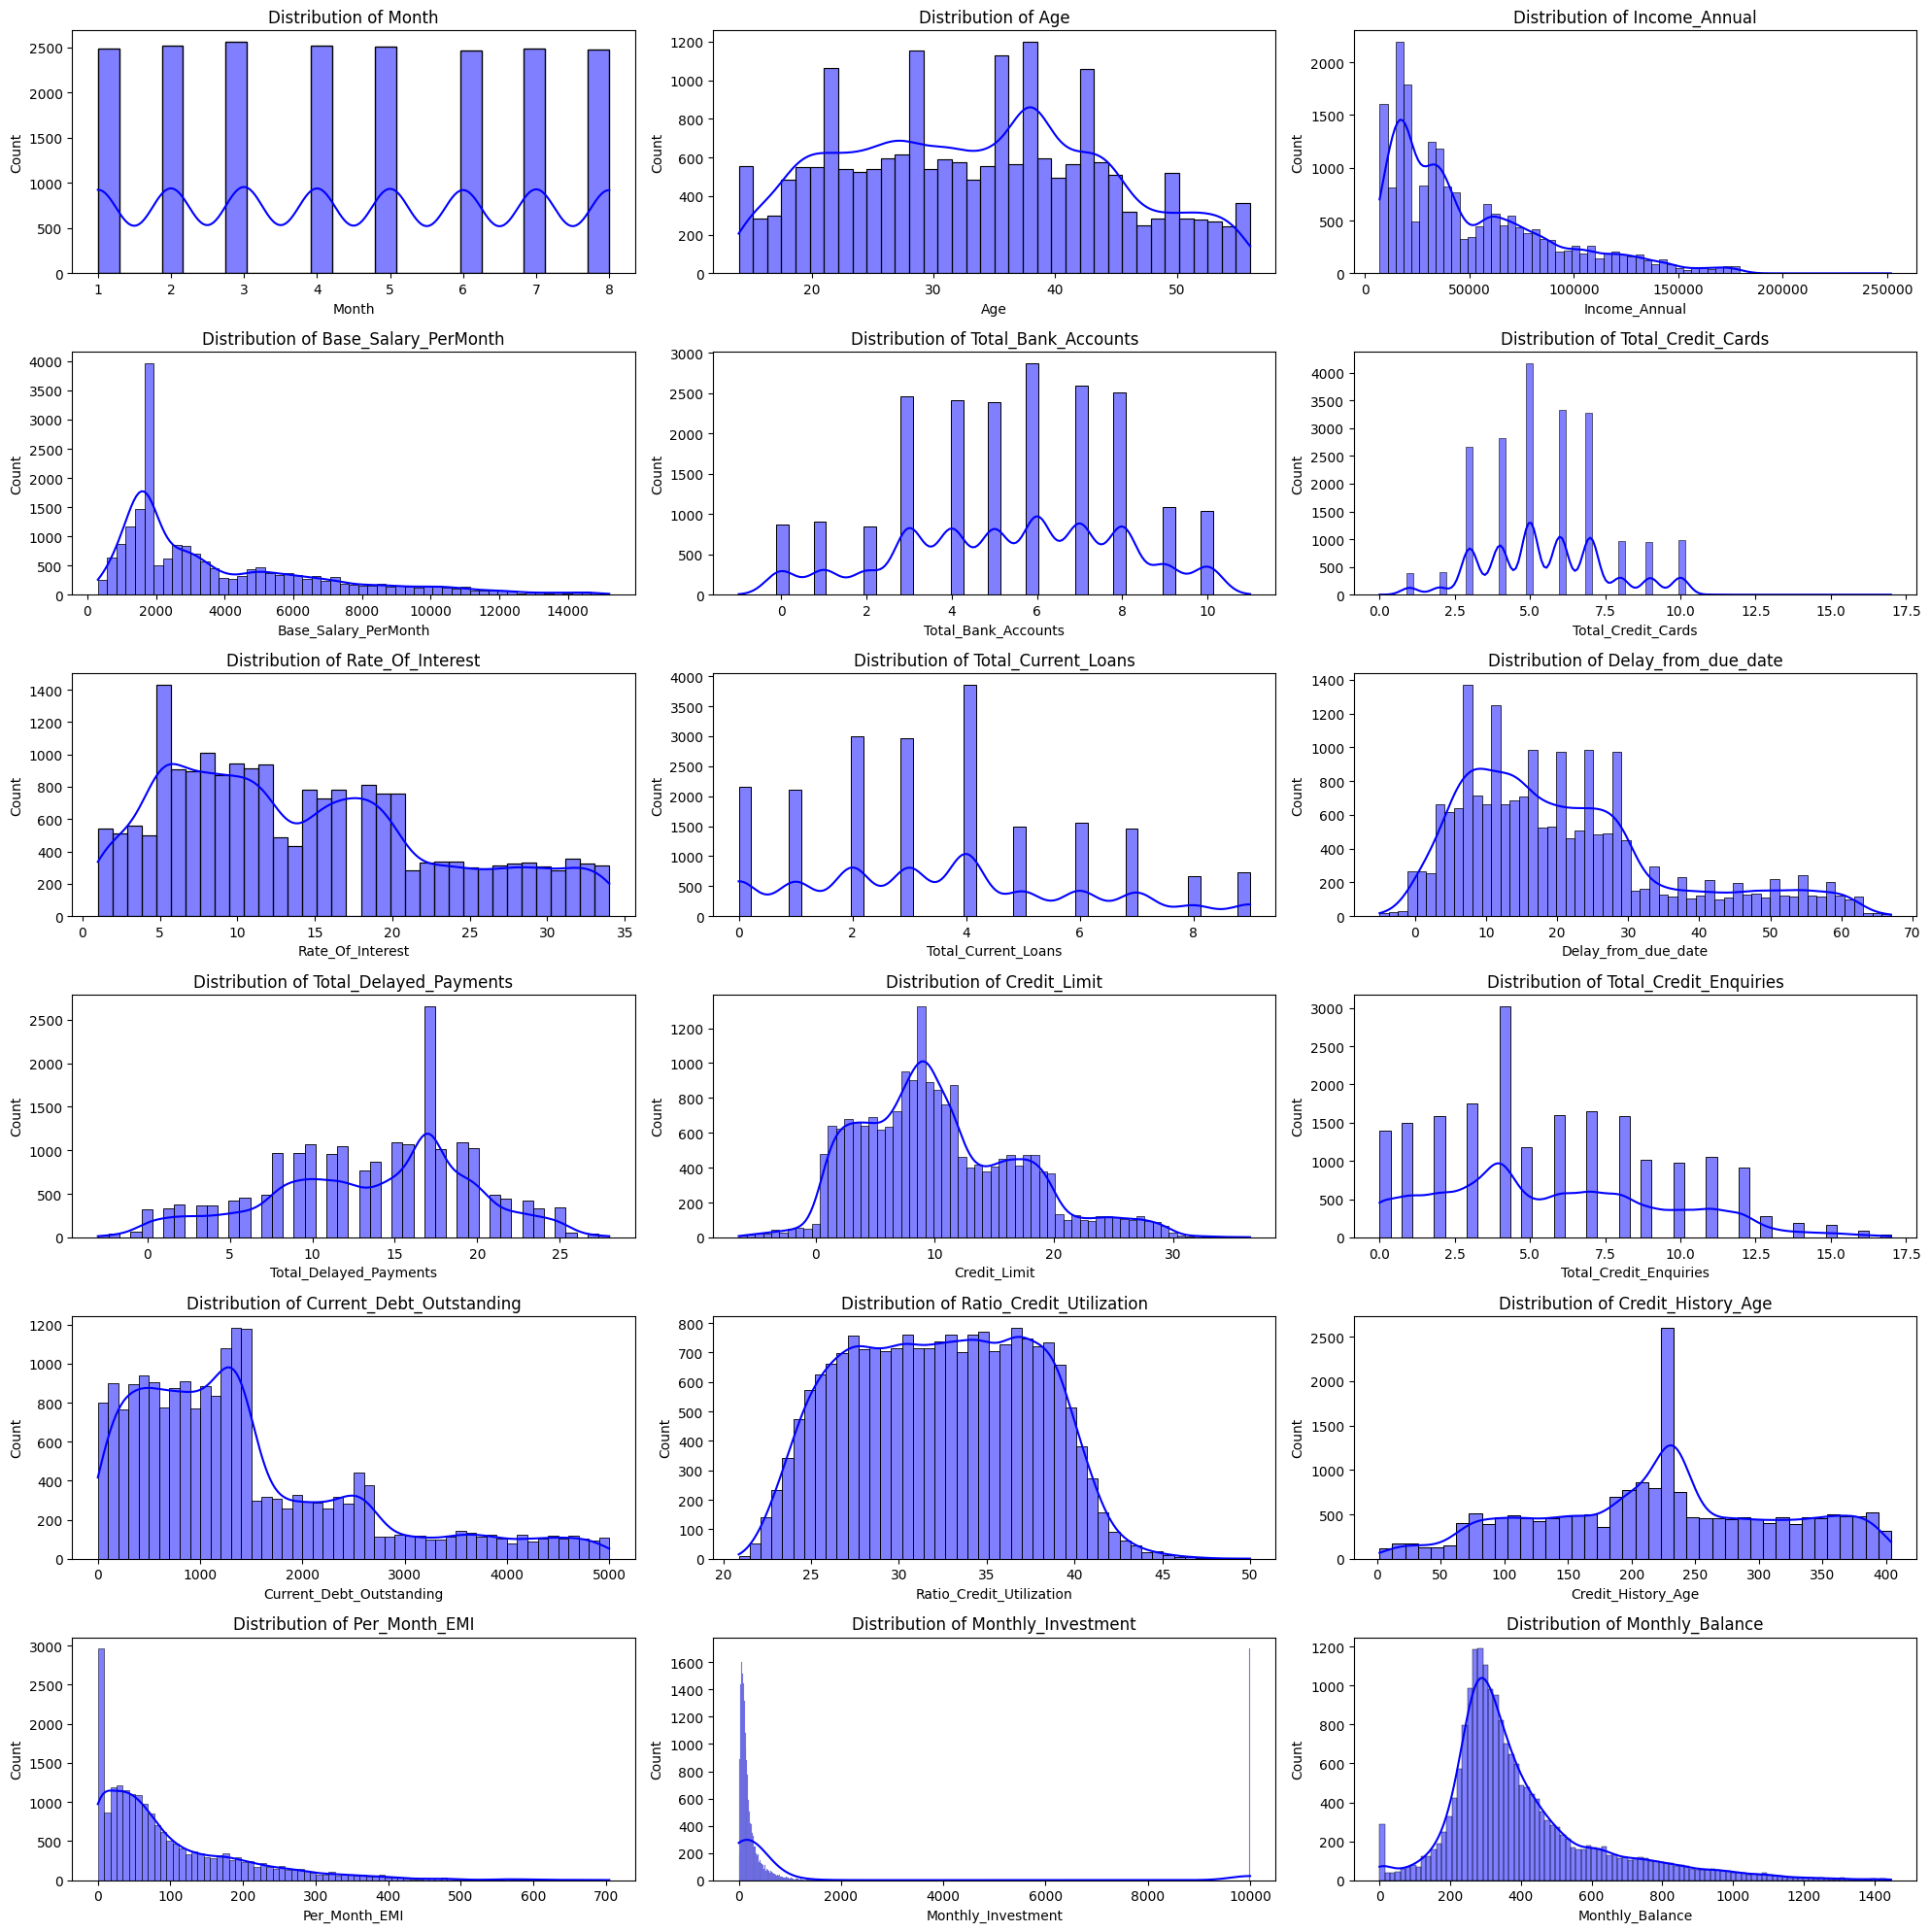

In [519]:
# Create plots for distribution of numerical features 
fig, axes = plt.subplots(6, 3, figsize=(20, 20))

axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(df_test[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [520]:
# Normalize the data
X_test1 = scaler.transform(df_test.drop('ID', axis=1))

In [521]:
# Predict the test data
y_pred = rf.predict(X_test1)

In [522]:
# Convert the predictions to original labels
y_pred = label_encoders['Credit_Score'].inverse_transform(y_pred)

/tmp/ipykernel_3370/2954363722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_pred, palette='viridis')


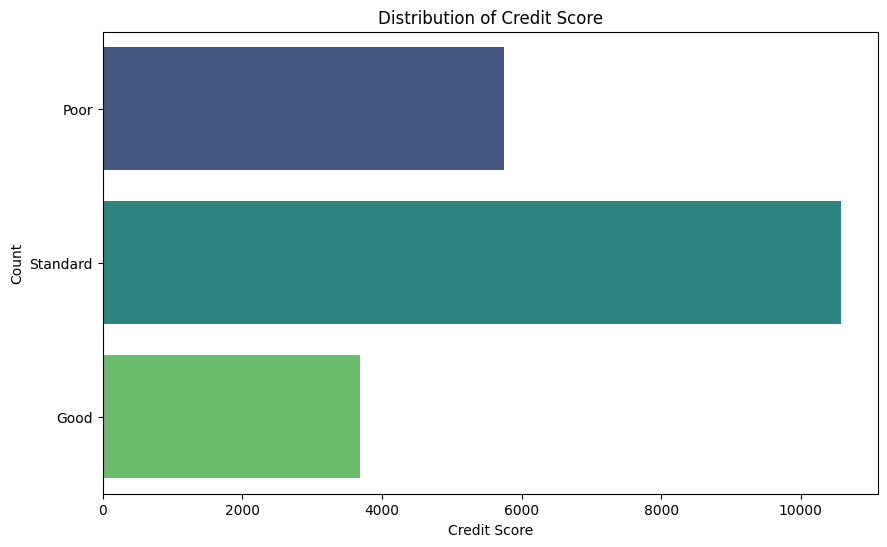

In [523]:
# Show credit score distribution
plt.figure(figsize=(10, 6))
sns.countplot(y_pred, palette='viridis')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

In [524]:
# Save the predictions to a CSV file
df_test['Credit_Score'] = y_pred

# Save as (ID, Credit_Score)
df_test[['ID', 'Credit_Score']].to_csv('submission_xgb.csv', index=False)